# **Social Media Analytics - Tesla's Twitter Data Analytics**

#### Group 9: Alessandro VARNELLI, Venkat JAYANARASIMHAN, Laura EL AOUFIR

## What is Tesla?

Tesla, Inc. is an American electric vehicle and clean energy company based in Palo Alto, California. Tesla's current products include electric cars, battery energy storage from home to grid scale, solar panels and solar roof tiles, as well as other related products and services.

# 

### I. Getting access to  the Twitter API and retrieving the data

In [87]:
# Loading Required Packages

options(warn=-1)

for (i in c('SnowballC','slam','tm','Matrix','tidytext','dplyr','hunspell','purrr','writexl','readxl','wordcloud','RWeka','rtweet','ggplot2', 'textrank','udpipe','plotly','tidyr', 'stringr', 'forcats','hrbrthemes','mgcv','stopwords')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org")
  require(i, character.only=TRUE)
}

Loading required package: RWeka
Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


package 'RWeka' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lelaoufir\AppData\Local\Temp\RtmpABv7Wc\downloaded_packages


Loading required package: RWeka
Error: package or namespace load failed for 'RWeka':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry
Loading required package: stopwords
also installing the dependencies 'credentials', 'zip', 'gitcreds', 'ini', 'gert', 'gh', 'withr', 'ISOcodes', 'usethis'



package 'credentials' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'gitcreds' successfully unpacked and MD5 sums checked
package 'ini' successfully unpacked and MD5 sums checked
package 'gert' successfully unpacked and MD5 sums checked
package 'gh' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'ISOcodes' successfully unpacked and MD5 sums checked
package 'usethis' successfully unpacked and MD5 sums checked
package 'stopwords' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lelaoufir\AppData\Local\Temp\RtmpABv7Wc\downloaded_packages


Loading required package: stopwords

Attaching package: 'stopwords'

The following object is masked from 'package:tm':

    stopwords



In [2]:
# Using Twitter App API Credentials

source("tokens.R")

twitter_token <- create_token(
                              app = appname,
                              consumer_key = consumer_key,
                              consumer_secret = consumer_secret,
                              access_token = access_token,
                              access_secret = access_secret,
                              set_renv=FALSE)

In [3]:
# Pulling 100 tweets of Tesla

tweets = get_timeline("@Tesla", n = 100, max_id = NULL, home = FALSE, parse = TRUE, check = TRUE, token = twitter_token)

In [4]:
# Checking the tweets

head(tweets,1)

user_id  status_id           created_at          screen_name
1 13298072 1356308401790328834 2021-02-01 18:28:16 Tesla      
  text                                                                                                                                     
1 Proud to have scored 100/100 in LGBTQ equality for the 6th year in a row <U+0001F3F3><U+FE0F><U+200D><U+0001F308> https://t.co/zz3PeKRRSL
  source             display_text_width reply_to_status_id reply_to_user_id
1 Twitter for iPhone 101                NA                 NA              
  reply_to_screen_name ... statuses_count favourites_count account_created_at 
1 NA                   ... 7633           3196             2008-02-10 01:12:32
  verified profile_url             profile_expanded_url  account_lang
1 TRUE     https://t.co/CCVEIYRgZJ https://www.tesla.com NA          
  profile_banner_url                                       
1 https://pbs.twimg.com/profile_banners/13298072/1554236549
  profile_background_url                          
1 http://abs.twimg.com/images/themes/theme1/bg.png
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png

In [5]:
# Getting the Column Names

colnames(tweets)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "quote_count"             "reply_count"            
[17] "hashtags"                "symbols"                
[19] "urls_url"                "urls_t.co"              
[21] "urls_expanded_url"       "media_url"              
[23] "media_t.co"              "media_expanded_url"     
[25] "media_type"              "ext_media_url"          
[27] "ext_media_t.co"          "ext_media_expanded_url" 
[29] "ext_media_type"          "mentions_user_id"       
[31] "mentions_screen_name"    "lang"                   
[33] "quoted_status_id"        "quoted_text"            
[35] "quoted_created_at"       "quoted_source"          
[37] "quoted_favorite_count"   "quoted_retweet_count"   
[39] "quoted_user_id"          "quoted_screen_name"     
[41] "quoted_name"             "quoted_followers_count" 
[43] "quoted_friends_count"    "quoted_statuses_count"  
[45] "quoted_location"         "quoted_description"     
[47] "quoted_verified"         "retweet_status_id"      
[49] "retweet_text"            "retweet_created_at"     
[51] "retweet_source"          "retweet_favorite_count" 
[53] "retweet_retweet_count"   "retweet_user_id"        
[55] "retweet_screen_name"     "retweet_name"           
[57] "retweet_followers_count" "retweet_friends_count"  
[59] "retweet_statuses_count"  "retweet_location"       
[61] "retweet_description"     "retweet_verified"       
[63] "place_url"               "place_name"             
[65] "place_full_name"         "place_type"             
[67] "country"                 "country_code"           
[69] "geo_coords"              "coords_coords"          
[71] "bbox_coords"             "status_url"             
[73] "name"                    "location"               
[75] "description"             "url"                    
[77] "protected"               "followers_count"        
[79] "friends_count"           "listed_count"           
[81] "statuses_count"          "favourites_count"       
[83] "account_created_at"      "verified"               
[85] "profile_url"             "profile_expanded_url"   
[87] "account_lang"            "profile_banner_url"     
[89] "profile_background_url"  "profile_image_url"

In [6]:
#Verifying mentioning stuff for Tesla through the search_tweets function

tweets_search <- search_tweets(q = "#Tesla", 
                        n = 200,
                        include_rts = FALSE,
                        `-filter` = "replies", token = twitter_token,,
                        lang = "en")

In [7]:
# Checking Tesla mentions

head(tweets_search,2)

user_id             status_id           created_at          screen_name
1 1352885301375496192 1357368796445609986 2021-02-04 16:41:54 imohdsufyn7
2 1355917698501369859 1357368508426964992 2021-02-04 16:40:45 ForcefulExp
  text                                                                                                                                                                                                      
1 @elonmusk Have any thoughts on making Tesla headphones and making it available on the market a day before 21 June. Might be a good idea.\n#day11 #Tesla #Teslaecosystem #iknowaboutneuralink #ideafortesla
2 @elonmusk  wallet has 34,812,350,134 #doge that's over a Billion USD! \n\nhttps://t.co/Z9xoRSdLBH\n\n#doge #dogecoin #elonmusk #themoon #tesla https://t.co/meS1LP4aJX                                    
  source              display_text_width reply_to_status_id  reply_to_user_id
1 Twitter for Android 191                1357248331387441153 44196397        
2 Twitter Web App     138                NA                  44196397        
  reply_to_screen_name ... statuses_count favourites_count account_created_at 
1 elonmusk             ... 16             32               2021-01-23 07:47:33
2 elonmusk             ...  6             14               2021-01-31 16:35:53
  verified profile_url profile_expanded_url account_lang
1 FALSE    NA          NA                   NA          
2 FALSE    NA          NA                   NA          
  profile_banner_url                                                  
1 https://pbs.twimg.com/profile_banners/1352885301375496192/1611388888
2 https://pbs.twimg.com/profile_banners/1355917698501369859/1612111168
  profile_background_url
1 NA                    
2 NA                    
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1352885881288310784/kEFLgQ6x_normal.jpg
2 http://pbs.twimg.com/profile_images/1355917784564248580/txTUbv12_normal.jpg

In [8]:
#As above but with @ instead of #

tweets_search_at <- search_tweets(q = "@Tesla", n = 200, include_rts = FALSE, `-filter` = "replies", token = twitter_token, lang = "en")

In [9]:
# Checking Tesla mentions

head(tweets_search_at,2)

user_id             status_id           created_at          screen_name 
1 1112752894233575425 1357368964209205250 2021-02-04 16:42:34 Tesla__Mania
2 1299852817478238208 1357368878691622913 2021-02-04 16:42:14 DavisHazen  
  text                                                                                                                                                         
1 My daily Teslacam video:\nOh a Tesla!\nOh another Tesla!\nStill another one!!\n\n@Tesla\n is literally all over Shanghai! \n@elonmusk https://t.co/2maVXOh65C
2 I’ll buy a @Tesla @elonmusk if you buy #gme the whole business lol! #papaelon                                                                                
  source             display_text_width reply_to_status_id reply_to_user_id
1 Twitter for iPhone 126                NA                 NA              
2 Twitter for iPhone  77                NA                 NA              
  reply_to_screen_name ... statuses_count favourites_count account_created_at 
1 NA                   ... 2901           8938             2019-04-01 16:25:38
2 NA                   ...  181            217             2020-08-29 23:34:04
  verified profile_url profile_expanded_url account_lang
1 FALSE    NA          NA                   NA          
2 FALSE    NA          NA                   NA          
  profile_banner_url                                                  
1 https://pbs.twimg.com/profile_banners/1112752894233575425/1568001491
2 NA                                                                  
  profile_background_url
1 NA                    
2 NA                    
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1206250204006977536/RHJPzGMK_normal.jpg
2 http://pbs.twimg.com/profile_images/1354675049635008512/819_Pust_normal.jpg

In [10]:
# Pulling favorites

tweets_favorites = get_favorites("Tesla", n = 200, since_id = NULL, max_id = NULL, parse = TRUE, token = twitter_token)

In [11]:
# Checking favorites

head(tweets_favorites,2)

user_id             status_id           created_at          screen_name 
1 1165695391830028288 1356309420582514693 2021-02-01 18:32:19 melaniemadri
2 3699668774          1355223837005123587 2021-01-29 18:38:36 CarolineGee8
  text                                                                                                                                                                                                  
1 @Tesla Tesla holds love for all.<U+0001F496><U+0001F3F3><U+FE0F><U+200D><U+0001F308> https://t.co/7dJ7qHk5k3                                                                                          
2 Contactless brand new @tesla delivery/pick up. Paper work signed in the car and left the form in the office. And off we go <U+0001F917>. Easy peasy . @elonmusk #tesla #modely https://t.co/kdZbdsCvAA
  source             display_text_width reply_to_status_id  reply_to_user_id
1 Twitter for iPhone  30                1356308401790328834 13298072        
2 Twitter for iPhone 163                NA                  NA              
  reply_to_screen_name ... favourites_count account_created_at  verified
1 Tesla                ... 30910            2019-08-25 18:40:31 FALSE   
2 NA                   ... 10116            2015-09-27 03:59:10 FALSE   
  profile_url             profile_expanded_url              account_lang
1 https://t.co/9I8IdtzV0Z http://instagram.com/melaniemadri NA          
2 NA                      NA                                NA          
  profile_banner_url                                                  
1 https://pbs.twimg.com/profile_banners/1165695391830028288/1607480031
2 https://pbs.twimg.com/profile_banners/3699668774/1571728415         
  profile_background_url                          
1 NA                                              
2 http://abs.twimg.com/images/themes/theme1/bg.png
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1298286304980094977/TOX0fWaO_normal.jpg
2 http://pbs.twimg.com/profile_images/1294864927765590018/pwj5QKl8_normal.jpg
  favorited_by
1 Tesla       
2 Tesla

#### I.a) Collecting Tesla's Tweets

In [12]:
# Getting the maximum number of tweets from Tesla

tesla_tweets <- get_timelines("tesla", n = 3200, language = 'en', token = twitter_token)

head(tesla_tweets,1)
tail(tesla_tweets,1)

user_id  status_id           created_at          screen_name
1 13298072 1356308401790328834 2021-02-01 18:28:16 Tesla      
  text                                                                                                                                     
1 Proud to have scored 100/100 in LGBTQ equality for the 6th year in a row <U+0001F3F3><U+FE0F><U+200D><U+0001F308> https://t.co/zz3PeKRRSL
  source             display_text_width reply_to_status_id reply_to_user_id
1 Twitter for iPhone 101                NA                 NA              
  reply_to_screen_name ... statuses_count favourites_count account_created_at 
1 NA                   ... 7633           3196             2008-02-10 01:12:32
  verified profile_url             profile_expanded_url  account_lang
1 TRUE     https://t.co/CCVEIYRgZJ https://www.tesla.com NA          
  profile_banner_url                                       
1 https://pbs.twimg.com/profile_banners/13298072/1554236549
  profile_background_url                          
1 http://abs.twimg.com/images/themes/theme1/bg.png
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png

user_id  status_id          created_at          screen_name
1 13298072 477517720737439744 2014-06-13 18:27:51 Tesla      
  text                                                                                                                         
1 @KimdeMora @p_maverick_b We have a location in Natick Mall if you want to come take a look at Model S: http://t.co/ODWG5jIBye
  source    display_text_width reply_to_status_id reply_to_user_id
1 TweetDeck 125                477517104393224192 55842362        
  reply_to_screen_name ... statuses_count favourites_count account_created_at 
1 KimdeMora            ... 7633           3196             2008-02-10 01:12:32
  verified profile_url             profile_expanded_url  account_lang
1 TRUE     https://t.co/CCVEIYRgZJ https://www.tesla.com NA          
  profile_banner_url                                       
1 https://pbs.twimg.com/profile_banners/13298072/1554236549
  profile_background_url                          
1 http://abs.twimg.com/images/themes/theme1/bg.png
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png

In [13]:
# Saving the data frame as an .rds file
saveRDS(tesla_tweets, file = "tesla_tweets.rds")

In [14]:
# Reading the stored dataframe
tesla_tweets <- readRDS(file = "tesla_tweets.rds")

In [15]:
# creating variables with the dates column (splitting year, month hour, day)
tesla_tweets$date <- as.Date(tesla_tweets$created_at)
tesla_tweets$time <- format(as.POSIXct(tesla_tweets$created_at), format = "%H:%M:%S")
tesla_tweets$year <- format(as.POSIXct(tesla_tweets$date), format = "%Y")
tesla_tweets$month <- format(as.POSIXct(tesla_tweets$date), format = "%m")
tesla_tweets$hour <- format(as.POSIXct(tesla_tweets$created_at), format = "%H")
tesla_tweets$day_num <- format(tesla_tweets$date,"%u")  
tesla_tweets$day_num <- as.numeric(tesla_tweets$day_num)
tesla_tweets$day <- weekdays(as.Date(tesla_tweets$created_at))

In [16]:
head(tesla_tweets)

user_id  status_id           created_at          screen_name
1 13298072 1356308401790328834 2021-02-01 18:28:16 Tesla      
2 13298072 1354752198270464008 2021-01-28 11:24:28 Tesla      
3 13298072 1354702642019233795 2021-01-28 08:07:33 Tesla      
4 13298072 1354702641008410626 2021-01-28 08:07:33 Tesla      
5 13298072 1354702640085676035 2021-01-28 08:07:33 Tesla      
6 13298072 1354702639007739905 2021-01-28 08:07:32 Tesla      
  text                                                                                                                                     
1 Proud to have scored 100/100 in LGBTQ equality for the 6th year in a row <U+0001F3F3><U+FE0F><U+200D><U+0001F308> https://t.co/zz3PeKRRSL
2 Plaid Model S ships next month https://t.co/HFUPTnQiPB                                                                                   
3 Plaid Model X has the quickest acceleration of any SUV by far, at 2.5 seconds 0-60                                                       
4 Plaid Model S is the first production car to achieve 0-60 in under 2 seconds                                                             
5 You can play The Witcher 3, Cyberpunk &amp; many more                                                                                    
6 New Model S &amp; Model X just launched\n\nDetails https://t.co/7Ol1BvJoj8                                                               
  source             display_text_width reply_to_status_id  reply_to_user_id
1 Twitter for iPhone 101                NA                  NA              
2 Twitter for iPhone  68                NA                  NA              
3 Twitter for iPhone  82                1354702641008410626 13298072        
4 Twitter for iPhone  76                1354702640085676035 13298072        
5 Twitter for iPhone  53                1354702639007739905 13298072        
6 Twitter for iPhone  72                NA                  NA              
  reply_to_screen_name ...
1 NA                   ...
2 NA                   ...
3 Tesla                ...
4 Tesla                ...
5 Tesla                ...
6 NA                   ...
  profile_banner_url                                       
1 https://pbs.twimg.com/profile_banners/13298072/1554236549
2 https://pbs.twimg.com/profile_banners/13298072/1554236549
3 https://pbs.twimg.com/profile_banners/13298072/1554236549
4 https://pbs.twimg.com/profile_banners/13298072/1554236549
5 https://pbs.twimg.com/profile_banners/13298072/1554236549
6 https://pbs.twimg.com/profile_banners/13298072/1554236549
  profile_background_url                          
1 http://abs.twimg.com/images/themes/theme1/bg.png
2 http://abs.twimg.com/images/themes/theme1/bg.png
3 http://abs.twimg.com/images/themes/theme1/bg.png
4 http://abs.twimg.com/images/themes/theme1/bg.png
5 http://abs.twimg.com/images/themes/theme1/bg.png
6 http://abs.twimg.com/images/themes/theme1/bg.png
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
2 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
3 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
4 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
5 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
6 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
  date       time     year month hour day_num day     
1 2021-02-01 18:28:16 2021 02    18   1       Monday  
2 2021-01-28 11:24:28 2021 01    11   4       Thursday
3 2021-01-28 08:07:33 2021 01    08   4       Thursday
4 2021-01-28 08:07:33 2021 01    08   4       Thursday
5 2021-01-28 08:07:33 2021 01    08   4       Thursday
6 2021-01-28 08:07:32 2021 01    08   4       Thursday

In [17]:
# Selecting the tweets from 2019 to 2020
tesla_tweets <- tesla_tweets %>% filter(date >= "2019-01-01" & date <= "2020-12-31")

#Checking the updated selection of tweets
dim(tesla_tweets)
str(tesla_tweets)

[1] 771  97

tibble [771 x 97] (S3: tbl_df/tbl/data.frame)
 $ user_id                : chr [1:771] "13298072" "13298072" "13298072" "13298072" ...
 $ status_id              : chr [1:771] "1326607188178006016" "1325493014941216768" "1317251873687113730" "1308618501062422528" ...
 $ created_at             : POSIXct[1:771], format: "2020-11-11 19:26:15" "2020-11-08 17:38:55" ...
 $ screen_name            : chr [1:771] "Tesla" "Tesla" "Tesla" "Tesla" ...
 $ text                   : chr [1:771] "Order solar panels before the solar tax credit drops at the end of this year. Pair with Powerwall to experience"| __truncated__ "20k Superchargers and counting https://t.co/urudyt9Eui" "There's no place like home..especially if it has a Solar Roof.\n\nThis Kansas ranch got theirs installed in 4 days." "In-car footage from Sunday’s Plaid Model S run at Laguna Seca https://t.co/rwQDBFCWoH" ...
 $ source                 : chr [1:771] "Twitter Web App" "Twitter Web App" "Twitter for Advertisers (legacy)" "Twitter We

# 

### II. How Does Tesla Reply to its Customers

#### II.a) Tesla's Total Replies to its Customers

In [18]:
# Checking the number of tweets which are posted as a Reply


reply_tweets <- tesla_tweets %>% filter(reply_to_screen_name != "NA")
reply_tweets <- tesla_tweets %>% filter(reply_to_screen_name != "Tesla")

saveRDS(reply_tweets, file = "reply_tweets.rds")

paste0("Total Number of Reply Tweets is: ", nrow(reply_tweets))

[1] "Total Number of Reply Tweets is: 289"

In [19]:
reply_tweets <- readRDS(file = "reply_tweets.rds")

In [20]:
# Checking the number of unique Screen Names addressed in the reply tweets

paste0("Total Number of Unique Screen Names addressed is: ", n_distinct(reply_tweets$reply_to_screen_name))

[1] "Total Number of Unique Screen Names addressed is: 259"

#### II.b) Tesla's Reply to Personal or Business Profiles

In [21]:
# Checking the profiles of Contact Points of these Reply Tweets

users  <- c(reply_tweets$reply_to_screen_name)
usr_df <- lookup_users(users, token = twitter_token)

In [22]:
# Saving the data frame as an .rds file
saveRDS(usr_df, file = "usr_df.rds")

In [23]:
# Reading the stored dataframe
usr_df <- readRDS(file = "usr_df.rds")

In [24]:
# Fetching the Number of Personal & Business Accounts through Verified Status

Personal <- sum(usr_df$verified == "FALSE")
Business <- sum(usr_df$verified == "TRUE")

Personal_Percent <- round((Personal/nrow(reply_tweets))*100)
Business_Percent <- round((Business/nrow(reply_tweets))*100)


paste0("Total Number of Personal Accounts Addressed is: ", Personal, " (", Personal_Percent , "%",")")
paste0("Total Number of Business Accounts Addressed is: ", Business, " (", Business_Percent , "%",")")

[1] "Total Number of Personal Accounts Addressed is: 218 (75%)"

[1] "Total Number of Business Accounts Addressed is: 33 (11%)"

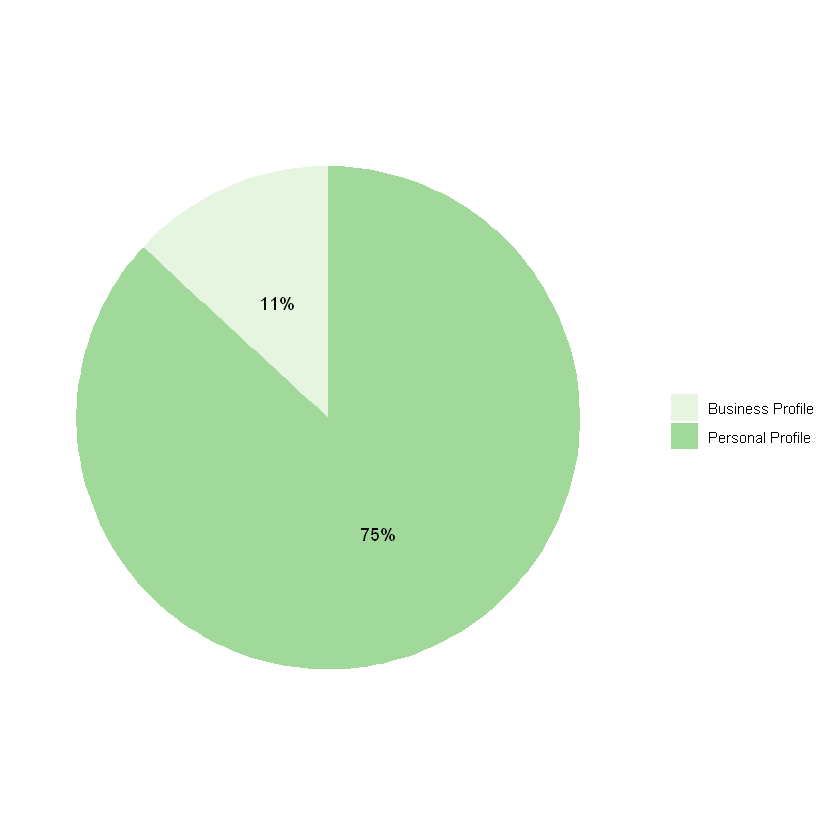

In [25]:
# Creating Pie-Chart for Replies to Personal Vs Business Profiles

#create data frame
data <- data.frame("Profile" = c('Personal Profile', 'Business Profile'),
                   "Replies" = c(Personal, Business))

Percent <- c(Personal_Percent,Business_Percent)

#create pie chart
ggplot(data, aes(x="", y=Replies, fill=Profile)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = (paste0(Percent, "%"))), position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL, fill = NULL) +
  theme_classic() +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank()) +
  scale_fill_brewer(palette="Greens")

#### II.c) Tesla's Reply to Mentions or No Mentions

In [26]:
# Collecting the Source Tweets of all the Reply Tweets addressed by Tesla (Fetching tweets based on Status_ID)

reply_status_tweets <- lookup_tweets(statuses = reply_tweets$reply_to_status_id, parse = TRUE, token = twitter_token)

In [27]:
# Saving the data frame as an .rds file
saveRDS(reply_status_tweets, file = "reply_status_tweets.rds")

In [28]:
# Reading the stored dataframe
reply_status_tweets <- readRDS(file = "reply_status_tweets.rds")

In [29]:
# Getting the Number of Reply Tweets for Mentions Vs No Mentions

Mention            <- sum(grepl('@', reply_status_tweets$text) | grepl('#', reply_status_tweets$text))
No_Mention         <- nrow(reply_tweets) - Mention

Mention_Percent    <- round((Mention/nrow(reply_tweets))*100)
No_Mention_Percent <- round((No_Mention/nrow(reply_tweets))*100)

paste0("Total Number of Replies to Mentions is:        ", Mention,    " (", Mention_Percent,    "%", ")")
paste0("Total Number of Replies to No Mentions is:  ",    No_Mention, " (", No_Mention_Percent, "%", ")")

[1] "Total Number of Replies to Mentions is:        249 (86%)"

[1] "Total Number of Replies to No Mentions is:  40 (14%)"

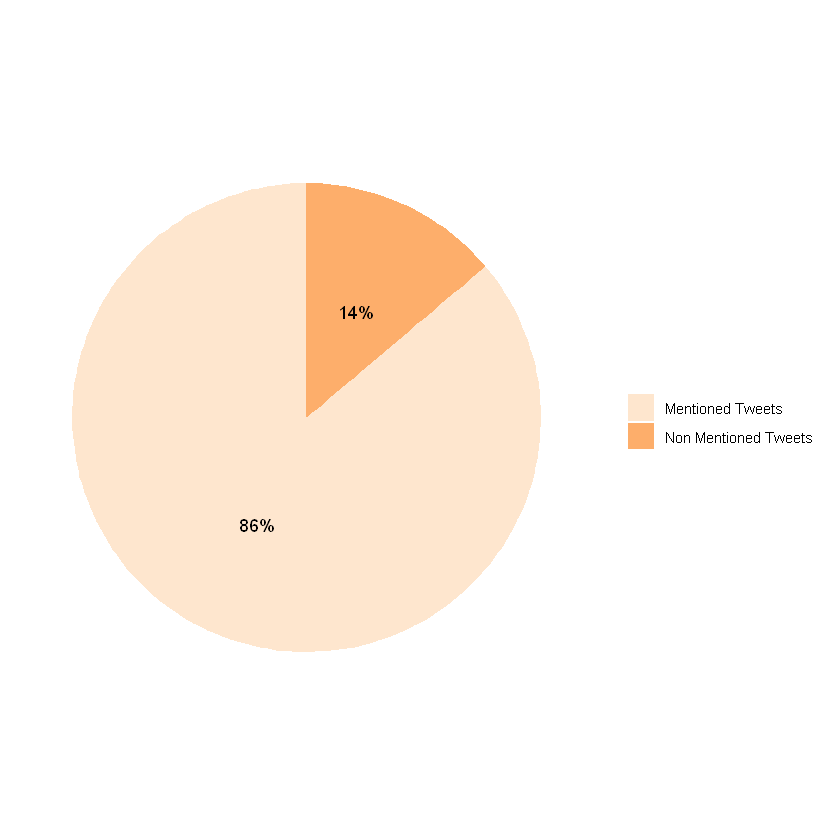

In [30]:
# Creating Pie-Chart for Replies to Mentioned Vs Non-Mentioned Tweets

#create data frame
data <- data.frame("Tweets" = c('Mentioned Tweets', 'Non Mentioned Tweets'),
                   "Replies" = c(Mention, No_Mention))

Percent <- c(Mention_Percent,No_Mention_Percent)

#create pie chart
ggplot(data, aes(x="", y=Replies, fill=Tweets)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = (paste0(Percent, "%"))), position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL, fill = NULL) +
  theme_classic() +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank()) +
  scale_fill_brewer(palette="Oranges")

#### II.d) Tesla's Reply to Positive, Negative or Neutral Tweets

In [31]:
# Preparing a clean dataset for Sentiment Analysis

#  Remove punctuation and numbers with regular expressions
reply_source_tweets <- mutate(reply_status_tweets, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

#  Tokenization (+ going to lowercase)
tweet_sentiment_Tokenized <- reply_source_tweets %>%  unnest_tokens(output = "word", # how should the new column be named?
                                                  input = text, # where can we find the text? 
                                                  token = "words", # which tokenization scheme should we follow?
                                                  drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase

nrow(tweet_sentiment_Tokenized)

[1] 3612

In [32]:
# Matching the Tweets with the Dictionary

tweet_sentiment <- inner_join(tweet_sentiment_Tokenized, get_sentiments("bing"))

head(tweet_sentiment,2)

Joining, by = "word"


user_id  status_id           created_at          screen_name
1 33081287 1139359880094060546 2019-06-14 02:32:18 iskep      
2 33081287 1139359880094060546 2019-06-14 02:32:18 iskep      
  text                                                                                                                                      
1 Tesla elonmusk k miles  I remember once I had to uh oh yeah thats right change tires Thanks for such an incredible machine httpstcoZMEotfs
2 Tesla elonmusk k miles  I remember once I had to uh oh yeah thats right change tires Thanks for such an incredible machine httpstcoZMEotfs
  source              display_text_width reply_to_status_id  reply_to_user_id
1 Twitter for Android 120                1139225262279708672 13298072        
2 Twitter for Android 120                1139225262279708672 13298072        
  reply_to_screen_name ... account_created_at  verified profile_url            
1 Tesla                ... 2009-04-19 01:24:08 FALSE    https://t.co/eI8oajL6uC
2 Tesla                ... 2009-04-19 01:24:08 FALSE    https://t.co/eI8oajL6uC
  profile_expanded_url                   account_lang
1 https://teespring.com/banned-president NA          
2 https://teespring.com/banned-president NA          
  profile_banner_url                                       
1 https://pbs.twimg.com/profile_banners/33081287/1459276507
2 https://pbs.twimg.com/profile_banners/33081287/1459276507
  profile_background_url                           
1 http://abs.twimg.com/images/themes/theme14/bg.gif
2 http://abs.twimg.com/images/themes/theme14/bg.gif
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1249047435709755401/zd2Gyp17_normal.jpg
2 http://pbs.twimg.com/profile_images/1249047435709755401/zd2Gyp17_normal.jpg
  word       sentiment
1 right      positive 
2 incredible positive

In [33]:
# Aggregating the Sentiments over each Tweet

Source_Tweet_Sentiment <- tweet_sentiment %>%
                          count(status_id, sentiment) %>%  # count the positives and negatives per id (status)
                          pivot_wider(id_cols = status_id, names_from=sentiment,values_from=n, values_fill = 0) %>%
                          mutate(sentiment = positive - negative)

head(Source_Tweet_Sentiment,3)
nrow(Source_Tweet_Sentiment)

status_id           negative positive sentiment
1 1082952453857964032 1        3        2        
2 1083451851767459840 0        4        4        
3 1084915461769244675 0        1        1

[1] 132

In [34]:
# Also including the Neutral Sentiments in addition to the Postive and Negative Tweets

Source_Tweet_Sentiment <- reply_source_tweets %>% left_join(Source_Tweet_Sentiment,by="status_id") %>% 
                                                            mutate(sentiment = ifelse(is.na(sentiment),0,sentiment))

In [35]:
# Calculating the Number of Positive, Negative and Neutral Tweets

Source_Tweet_Sentiment$positive[is.na(Source_Tweet_Sentiment$positive)]   <- 0
Source_Tweet_Sentiment$negative[is.na(Source_Tweet_Sentiment$negative)]   <- 0

positive <- sum(Source_Tweet_Sentiment$positive)
negative <- sum(Source_Tweet_Sentiment$negative)
neutral  <- nrow(reply_source_tweets) - (positive+negative)

positive_percent <- round((positive/nrow(reply_source_tweets))*100)
negative_percent <- round((negative/nrow(reply_source_tweets))*100)
neutral_percent  <- round((neutral/nrow(reply_source_tweets))*100)

paste0("Total Number of Replies to Positive Tweets is:  ", positive,  " (", positive_percent ,  "%",   ")")
paste0("Total Number of Replies to Negative Tweets is:  ", negative,  " (", negative_percent ,  "%",   ")")
paste0("Total Number of Replies to Neutral  Tweets is:  ", neutral,   " (", neutral_percent  ,  "%",   ")")

[1] "Total Number of Replies to Positive Tweets is:  156 (61%)"

[1] "Total Number of Replies to Negative Tweets is:  68 (26%)"

[1] "Total Number of Replies to Neutral  Tweets is:  33 (13%)"

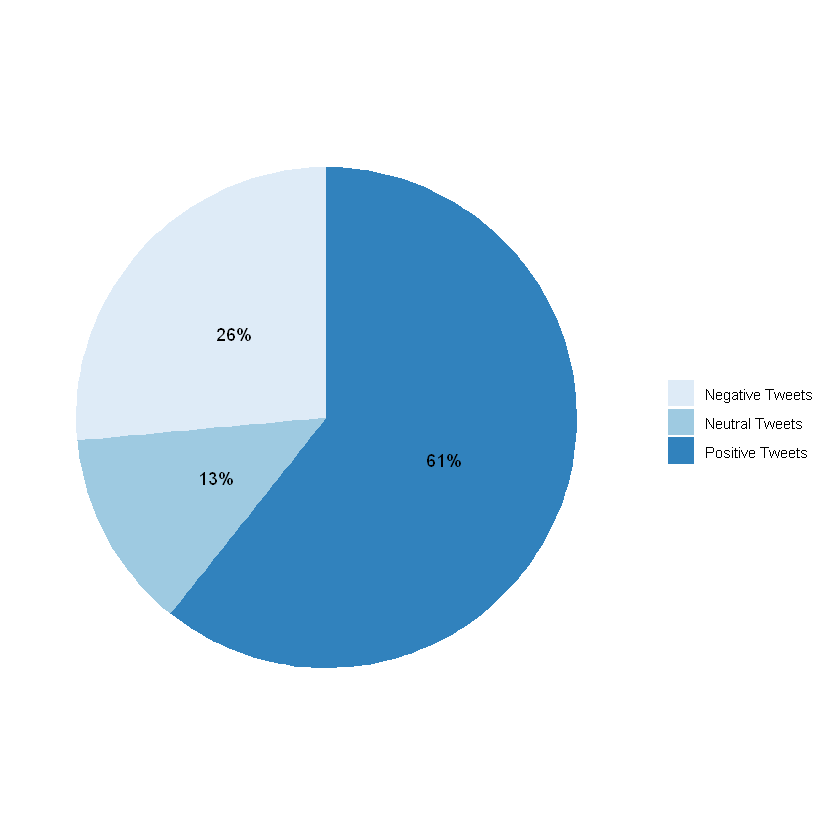

In [36]:
# Creating Pie-Chart for Replies to Positive, Negative and Neutral Tweets

#create data frame
data <- data.frame("Sentiment" = c('Positive Tweets', 'Negative Tweets', 'Neutral Tweets'),
                   "Replies"   = c(positive, negative, neutral))

Percent <- c(positive_percent, negative_percent, neutral_percent)

#create pie chart
ggplot(data, aes(x="", y=Replies, fill=Sentiment)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = (paste0(Percent, "%"))), position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL, fill = NULL) +
  theme_classic() +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank()) +
  scale_fill_brewer(palette="Blues")

# 

### III. Overall Summary of Tesla's Tweets

In [37]:
# Converting any NA value to 0

tesla_tweets$retweet_count[is.na(tesla_tweets$retweet_count)]   <- 0
tesla_tweets$favorite_count[is.na(tesla_tweets$favorite_count)] <- 0
tesla_tweets$quote_count[is.na(tesla_tweets$quote_count)]       <- 0
tesla_tweets$reply_count[is.na(tesla_tweets$reply_count)]       <- 0

In [38]:
# Getting the followers list of Tesla (100)

#followers <- get_followers(user="@Tesla", n=15000000, retryonratelimit = TRUE, token=twitter_token)

followers <- 7398637

#44708851 (Elonmusk)
#7398637 (Tesla) 
#14303039 (SpaceX)

#### III.a) Engagement Rate

In [39]:
# Calculating the Twitter Engagement Rate

tesla_tweets$engagement_rate <- (((tesla_tweets$retweet_count + tesla_tweets$favorite_count + tesla_tweets$quote_count +                                                      tesla_tweets$reply_count) / followers) * 100)

avg <- round(mean(tesla_tweets$engagement_rate),2)

paste0("Average Twitter Engagement Rate is ", avg, "%")

[1] "Average Twitter Engagement Rate is 0.11%"

#### III.b) Volume of Tweets

In [40]:
# Calculating the Tesla's Tweet Volume

volume <- nrow(tesla_tweets)

paste0("Overall Twitter Volume is ", volume, " Tweets")

[1] "Overall Twitter Volume is 771 Tweets"

#### III.c) Directed or Undirected Tweets

In [41]:
# Calculating the Number of directed or undirected tweets

Directed     <- sum(grepl('@', tesla_tweets$text) | grepl('#', tesla_tweets$text))
Non_Directed <- nrow(tesla_tweets) - Directed

Directed_Percent     <- round((Directed/nrow(tesla_tweets))*100)
Non_Directed_Percent <- round((Non_Directed/nrow(tesla_tweets))*100)

paste0("Total Number of Directed Tweets is:          ", Directed,     " (", Directed_Percent,     "%", ")")
paste0("Total Number of Non Directed Tweets is:  ",     Non_Directed, " (", Non_Directed_Percent, "%", ")")

[1] "Total Number of Directed Tweets is:          413 (54%)"

[1] "Total Number of Non Directed Tweets is:  358 (46%)"

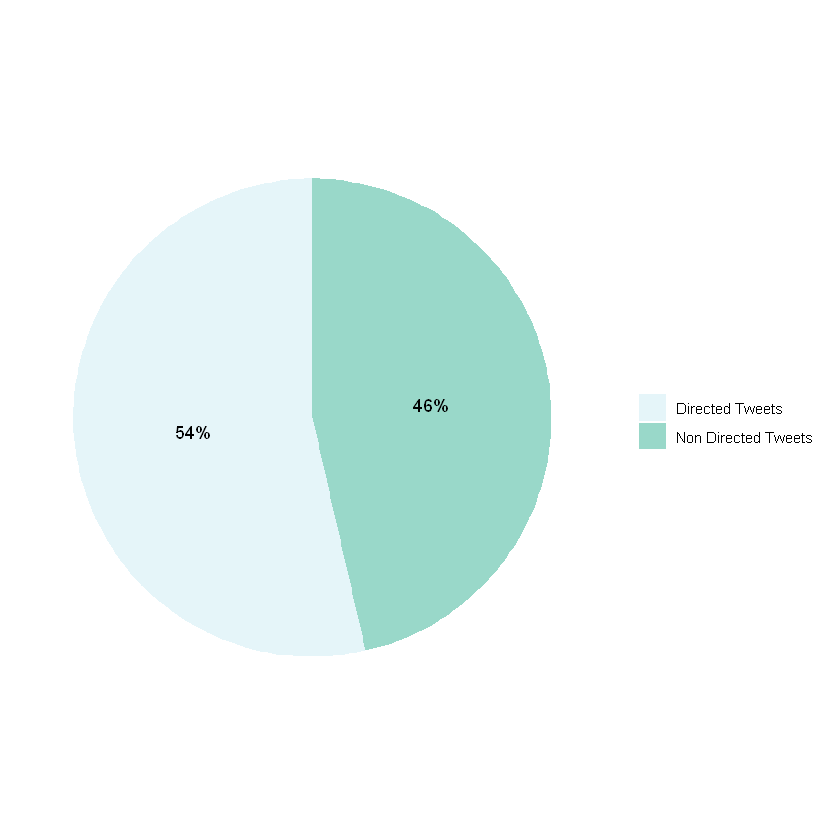

In [42]:
# Creating Pie-Chart for Directed and Non-Directed Tweets

#create data frame
data <- data.frame("Tweets" = c('Directed Tweets', 'Non Directed Tweets'),
                   "Amount"   = c(Directed, Non_Directed))

Percent <- c(Directed_Percent, Non_Directed_Percent)

#create pie chart
ggplot(data, aes(x="", y=Amount, fill=Tweets)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = (paste0(Percent, "%"))), position = position_stack(vjust=0.5)) +
  labs(x = NULL, y = NULL, fill = NULL) +
  theme_classic() +
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank()) +
  scale_fill_brewer(palette="BuGn")

#### III.d) Number of Tweets over Time

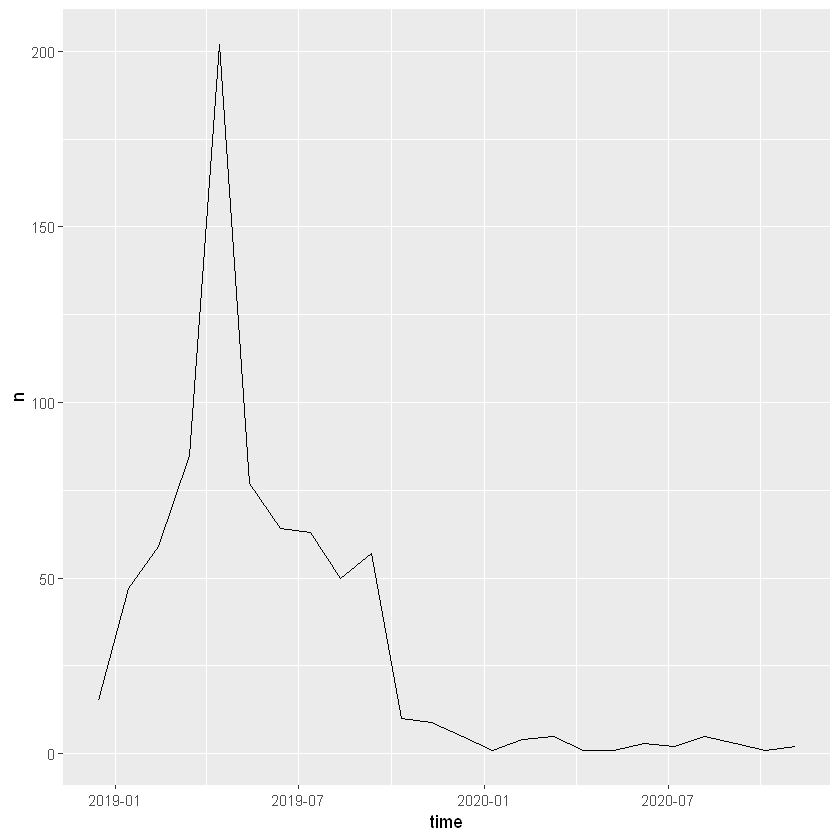

In [43]:
# Creating Time-Series graph for the frequency of tweets by Tesla

ts_plot(tesla_tweets, by = "months", trim = 0L, tz = "UTC")

# Number of tweets posted reached it's maximum around April 2019

#### III.e) Tweets Type Distribution

In [44]:
# Keeping only the retweets
tesla_retweets <- tesla_tweets[tesla_tweets$is_retweet==TRUE,]

# Keeping only the replies
tesla_replies <- subset(tesla_tweets, !is.na(tesla_tweets$reply_to_status_id))

# Keeping only the organic tweets
tesla_tweets_organic <- tesla_tweets[tesla_tweets$is_retweet==FALSE, ] 
tesla_tweets_organic <- subset(tesla_tweets_organic, is.na(tesla_tweets_organic$reply_to_status_id)) 

In [45]:
# count of tweets, retweets and replies
tesla_tweets_organic %>% count()
tesla_retweets %>% count()
tesla_replies %>% count()

n  
1 282

n 
1 78

n  
1 411

In [46]:
# Creating a data frame to create a graph
data <- data.frame(
  category=c("Organic", "Retweets", "Replies"),
  count=c(282, 78, 411)
)

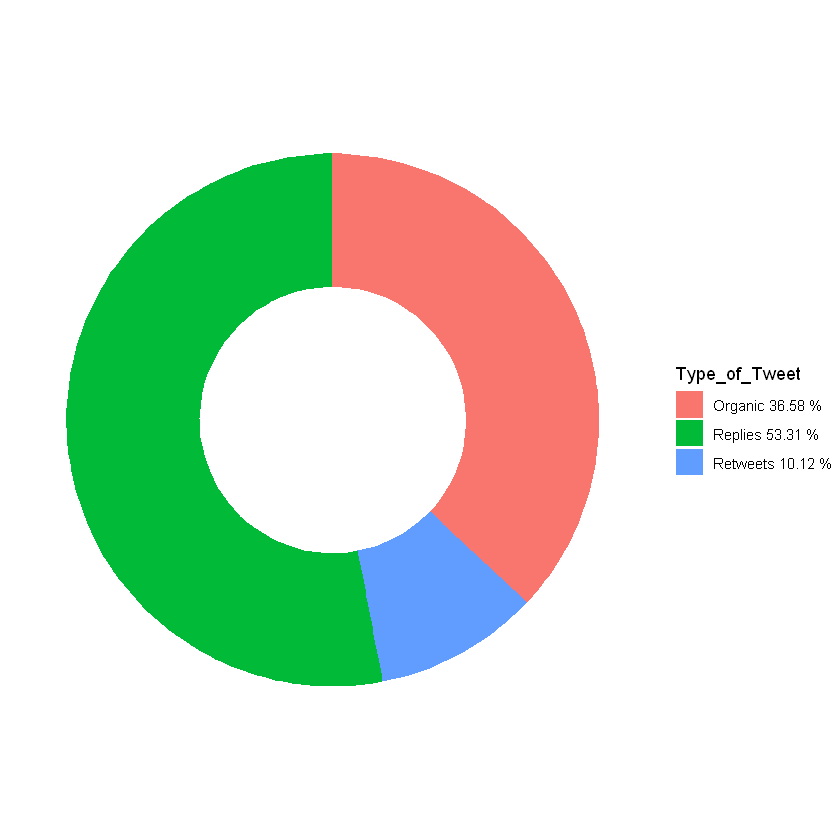

In [47]:
# Adding columns with counts and fractions of tweets types
data$fraction = data$count / sum(data$count)
data$percentage = data$count / sum(data$count) * 100
data$ymax = cumsum(data$fraction)
data$ymin = c(0, head(data$ymax, n=-1))

# Function to round
round_df <- function(df, digits) {
  nums <- vapply(df, is.numeric, FUN.VALUE = logical(1))

  df[,nums] <- round(df[,nums], digits = digits)

  (df)
}

# Rounding the data to two decimal points
data <- round_df(data, 2)

# Specify what the legend should say
Type_of_Tweet <- paste(data$category, data$percentage, "%")
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Type_of_Tweet)) +
  geom_rect() +
  coord_polar(theta="y") + 
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

#### III.f) Tweets Source

In [48]:
## Tweets location
tesla_app <- tesla_tweets %>% 
  select(source) %>% 
  group_by(source) %>%
  summarize(count=n())

tesla_app <- subset(tesla_app, count > 11)

`summarise()` ungrouping output (override with `.groups` argument)


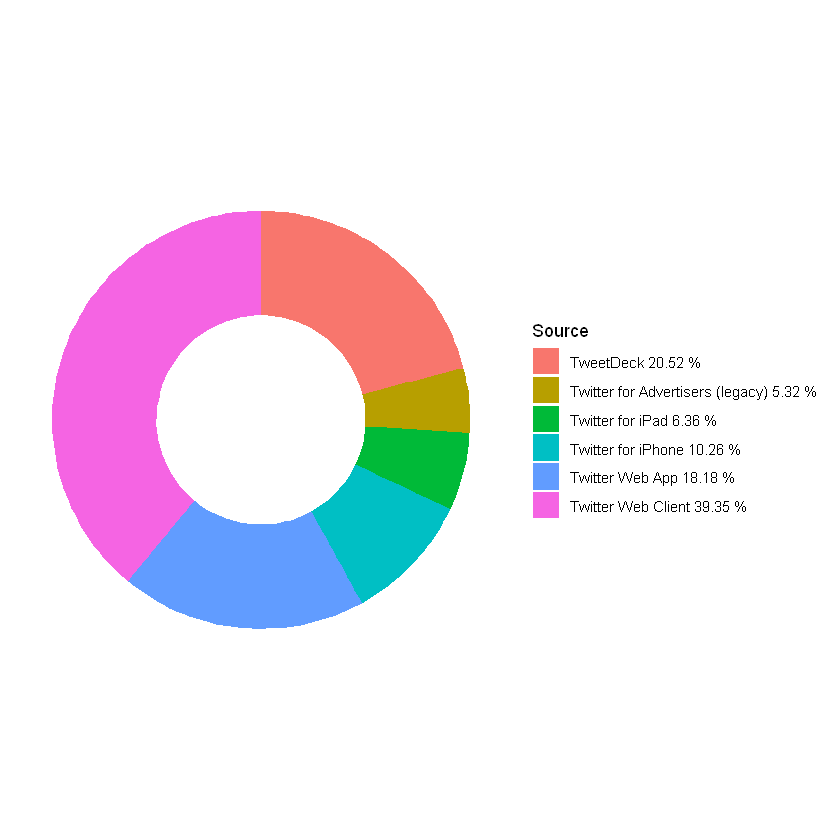

In [49]:
## Creating a dataframe with source and count of tweets per source
data <- data.frame(
  category=tesla_app$source,
  count=tesla_app$count
)
data$fraction = data$count / sum(data$count)
data$percentage = data$count / sum(data$count) * 100
data$ymax = cumsum(data$fraction)
data$ymin = c(0, head(data$ymax, n=-1))
data <- round_df(data, 2)
Source <- paste(data$category, data$percentage, "%")
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Source)) +
  geom_rect() +
  coord_polar(theta="y") + # Try to remove that to understand how the chart is built initially
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "right")

#### III.g) Tweets Frequency

In [50]:
# taking only the tweets from 2020
tesla_tweets_2019 <- tesla_tweets %>% filter(year==2019)
dim(tesla_tweets_2019)

[1] 742  98

In [51]:
# checking total number of tweets
tesla_tweets %>% group_by(day) %>% summarize(count = n())

`summarise()` ungrouping output (override with `.groups` argument)


day       count
1 Friday    168  
2 Monday     88  
3 Saturday   65  
4 Sunday     44  
5 Thursday  157  
6 Tuesday   124  
7 Wednesday 125

`summarise()` regrouping output by 'day' (override with `.groups` argument)


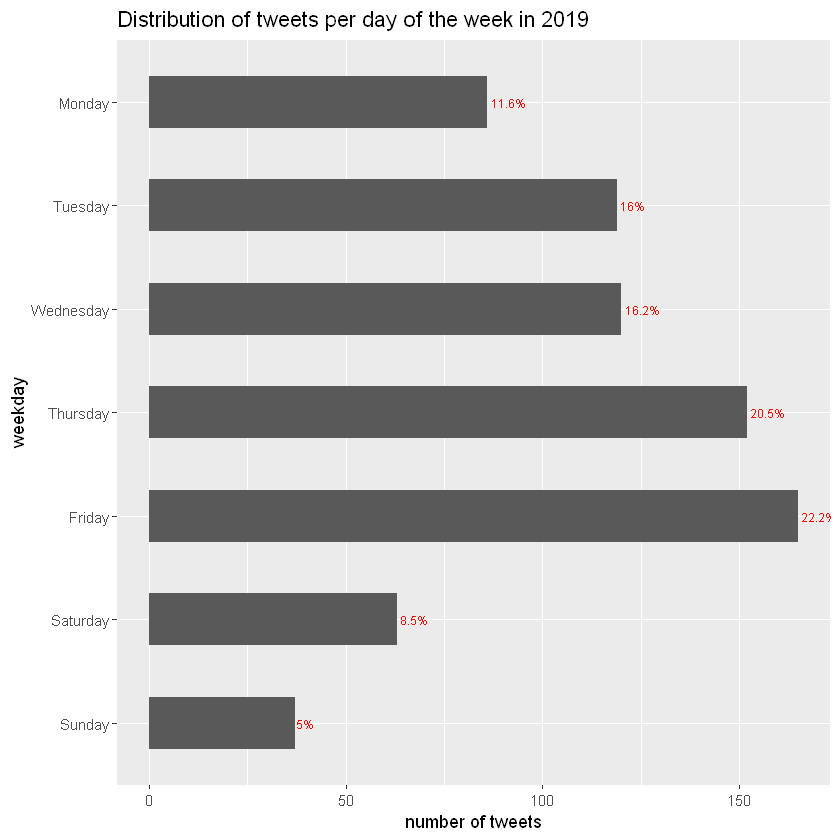

In [52]:
# BY DAY
# plotting number of tweets
byday_plot <- tesla_tweets_2019 %>% group_by(day, day_num) %>% summarize(count = n())

# plotting
ggplot(byday_plot, aes(y=reorder(day,-day_num), x=count)) +
  geom_bar(stat = "identity", width=0.5) +
  geom_text(aes(label=paste(round(count/742*100,1),"%",sep="")),hjust=-0.1, col="red", size=2.5) +
  labs(title= "Distribution of tweets per day of the week in 2019",
       y="weekday", x = "number of tweets")

`summarise()` ungrouping output (override with `.groups` argument)


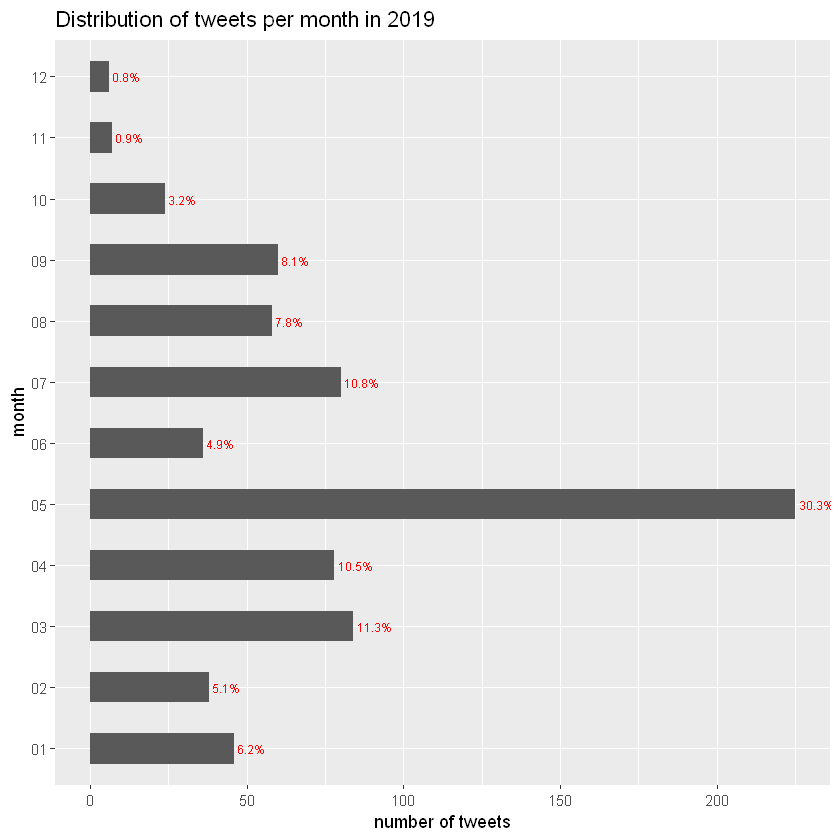

In [53]:
# BY MONTH
# plotting number of tweets
bymonth_plot <- tesla_tweets_2019 %>% group_by(month) %>% summarize(count = n())

# plotting
ggplot(bymonth_plot, aes(y=month, x=count)) +
  geom_bar(stat = "identity", width=0.5) +
  geom_text(aes(label=paste(round(count/742*100,1),"%",sep="")),hjust=-0.1, col="red", size=2.5) +
  labs(title= "Distribution of tweets per month in 2019",
       y="month", x = "number of tweets")

`summarise()` ungrouping output (override with `.groups` argument)


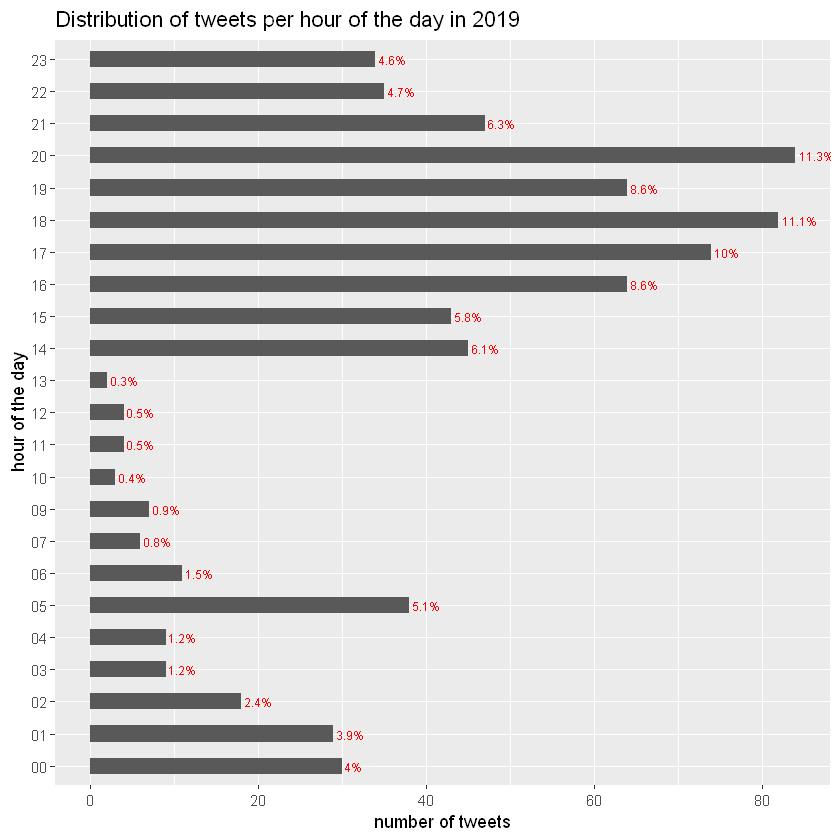

In [54]:
# BY HOUR
# plotting number of tweets
byhour_plot <- tesla_tweets_2019 %>% group_by(hour) %>% summarize(count = n())

# plotting
ggplot(byhour_plot, aes(y=hour, x=count)) +
  geom_bar(stat = "identity", width=0.5) +
  geom_text(aes(label=paste(round(count/742*100,1),"%",sep="")),hjust=-0.1, col="red", size=2.5) +
  labs(title= "Distribution of tweets per hour of the day in 2019",
       y="hour of the day", x = "number of tweets")

In [55]:
# average number of tweets per day
tesla_tweets_2019 %>% group_by(date) %>% summarize(count = n()) %>% summarize(across(count,mean))

`summarise()` ungrouping output (override with `.groups` argument)


count   
1 3.268722

In [56]:
# Weekly overview frequency with a heat map
tweets_day_hour <- tesla_tweets_2019 %>% group_by(day,day_num,hour) %>% summarize(count = n())

`summarise()` regrouping output by 'day', 'day_num' (override with `.groups` argument)


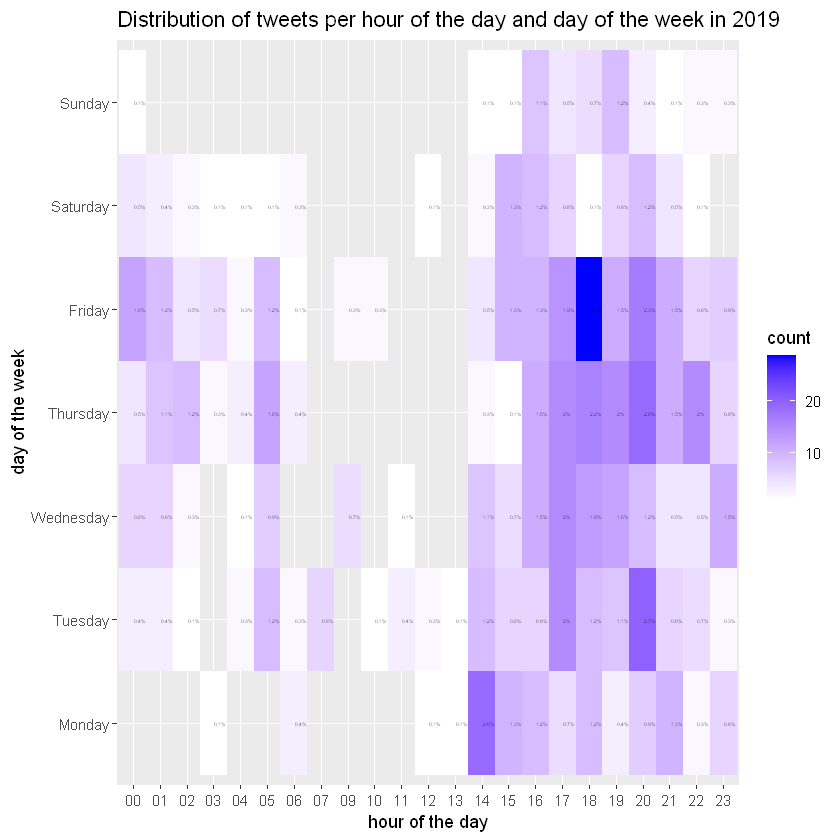

In [57]:
# plotting
ggplot(tweets_day_hour, aes(x=hour, y=reorder(day,day_num))) +
    geom_tile(aes(fill=count)) +
    scale_fill_gradient(low="white", high="blue")+
  geom_text(aes(label=paste(round(count/742*100,1),"%",sep="")),hjust=-0.1, col="black", size=1) +
  labs(title= "Distribution of tweets per hour of the day and day of the week in 2019",
       y="day of the week", x = "hour of the day")

#### III.h) Tweets Emojis

In [58]:
# cleaning the text data and removing the retweets
tesla_tweets %>%
  filter(!is_retweet) %>% 
  select(text) %>% 
  mutate(text = gsub(pattern = "\\n\\n", replacement = "\\n", x = text)) %>%
  head()  %>%
  knitr::kable(escape = TRUE)



|text                                                                                                                                                       |
|:----------------------------------------------------------------------------------------------------------------------------------------------------------|
|Order solar panels before the solar tax credit drops at the end of this year. Pair with Powerwall to experience no more blackouts!
https://t.co/gvX4KnG2ca |
|20k Superchargers and counting https://t.co/urudyt9Eui                                                                                                     |
|There's no place like home..especially if it has a Solar Roof.nThis Kansas ranch got theirs installed in 4 days.                                           |
|In-car footage from Sunday’s Plaid Model S run at Laguna Seca https://t.co/rwQDBFCWoH                                                                      |
|The only thing beyond Ludicrous is Plaid         

In [59]:
# removing anything but a potential emoji
text_only <- tesla_tweets_2019 %>%
  filter(!is_retweet) %>%
  mutate(
    # add spaces before the # and @
    clean_text = gsub(x = text, pattern = "(?=@)",
                      replacement = " ", perl = TRUE) %>%
      gsub(x = ., pattern = "(?=#)", replacement = " ", perl = TRUE) %>%
      str_replace_all(pattern = "\n", replacement = "") %>%
      str_replace_all(pattern = "&amp;", replacement = "") %>%
      # remove accounts mentionned with an @
      str_replace_all(pattern = "@([[:punct:]]*\\w*)*", replacement = "") %>%
      # remove URLs
      str_replace_all(pattern = "http([[:punct:]]*\\w*)*", replacement = "") %>%
      # remove punctuaction signs except #
      gsub(x = ., pattern = "(?!#)[[:punct:]]",
           replacement = "", perl = TRUE) %>%
      # lowercase the text
      tolower() %>%
      # remove isolated digits
      str_replace_all(pattern = " [[:digit:]]* ", replacement = " ")
  )

In [60]:
all_emojis_in_tweets <- emojis %>% 
  # for each emoji, find tweets containing this emoji       
  mutate(tweet = map(code, ~grep(.x, text_only$text))) %>% 
  unnest(tweet) %>%
  # count the number of tweets in which each emoji was found           
  count(code, description) %>% 
  mutate(emoji = paste(code, description)) 

In [61]:
# Define a personnal theme for the plot colours (source:https://marionlouveaux.fr/blog/2020-04-18_analysing-twitter-data-with-r-part3/)

custom_plot_theme <- function(...){
  theme_classic() %+replace%
    theme(panel.grid = element_blank(),
          axis.line = element_line(size = .7, color = "black"),
          axis.text = element_text(size = 11),
          axis.title = element_text(size = 12),
          legend.text = element_text(size = 11),
          legend.title = element_text(size = 12),
          legend.key.size = unit(0.4, "cm"),
          strip.text.x = element_text(size = 12, colour = "black", angle = 0),
          strip.text.y = element_text(size = 12, colour = "black", angle = 90))
}

## Set theme for all plots 
theme_set(custom_plot_theme())

# Define a palette for graphs
greenpal <- colorRampPalette(brewer.pal(9,"Greens"))

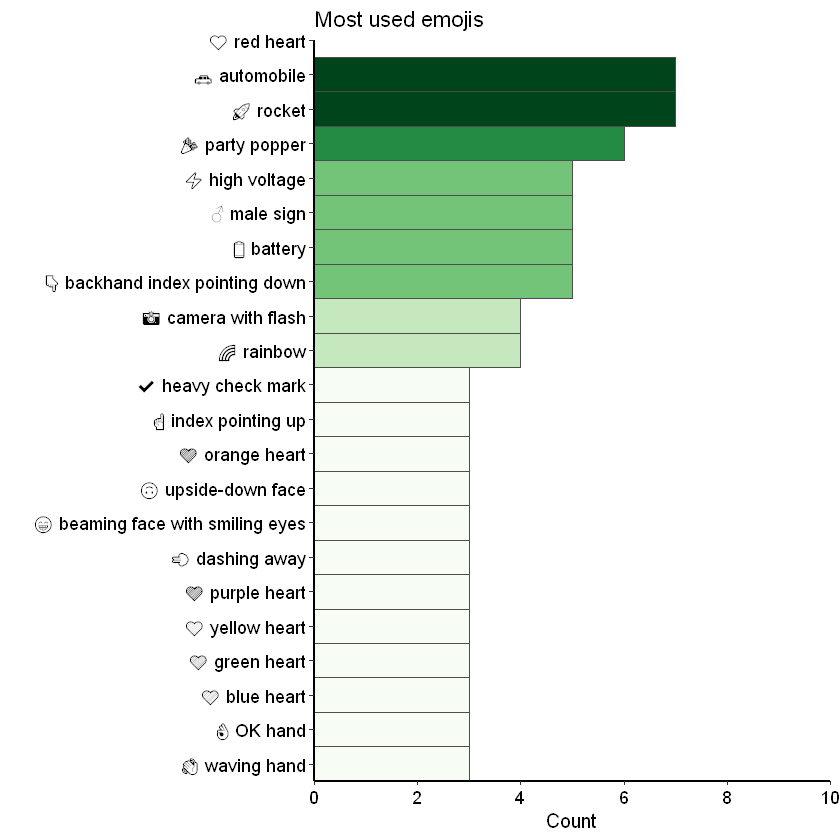

In [62]:
# plotting the most used emojis
all_emojis_in_tweets %>% 
  top_n(20, n) %>% 
ggplot() +
  geom_col(aes(x = fct_reorder(emoji, n), y = n, fill = n), 
           colour = "grey30", width = 1) +
  labs(x = "", y = "Count", title = "Most used emojis") +
  coord_flip() +
  scale_fill_gradientn("n", colours = greenpal(10), guide = "none") +
  scale_y_continuous(expand = c(0, 0),
                     breaks=seq(0, 10, 2), limits = c(0,10)) +
  scale_x_discrete(expand = c(0, 0)) 

#### III.i) Tweets Hashtags

In [63]:
# code source: https://rstudio-pubs-static.s3.amazonaws.com/595002_2d1617098c8c44b494bc2ec97018a82b.html

# search hashtags in text, search strings beginning by #
hashtag_pat <- "#[a-zA-Z0-9_-ー\\.]+"
hashtag <- str_extract_all(tesla_tweets_2019$text, hashtag_pat)

# convert list to vectors, to lowercase and removing special characters
hashtag_word <- unlist(hashtag)
hashtag_word <- tolower(hashtag_word)
hashtag_word <- gsub("[[:punct:]ー]", "", hashtag_word)

# checking frequencies of each hashtags
hashtag_count <- table(hashtag_word)
top_20_freqs <- sort(hashtag_count, decreasing = TRUE)[1:20]
top_20_freqs

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in stri_extract_all_regex(string, pattern, simplify = simplify, : In a character range [x-y], x is greater than y. (U_REGEX_INVALID_RANGE)


In [64]:
as.data.frame(hashtag_word) %>%
  count(hashtag_word, sort = TRUE) %>%
  mutate(hashtag_word = reorder(hashtag_word, n)) %>%
  top_n(20) %>%
  ggplot(aes(x = hashtag_word, y = n)) +
  geom_col() +
  coord_flip() +
  labs(x = "Hashtag",
       y = "Count",
       title = "Top 20 Popular Hashtags along with Covid19")

ERROR: Error in as.data.frame(hashtag_word): object 'hashtag_word' not found


In [65]:
# Wordcloud of most used hashtags
top_20_hashtags <- as.character(as.data.frame(top_20_freqs)[,1])
wordcloud(top_20_hashtags, top_20_freqs, 
          scale=c(3.5,1.5), random.order=FALSE, rot.per=.25)

ERROR: Error in as.data.frame(top_20_freqs): object 'top_20_freqs' not found


#### III.j) Best Tweets and Favourites

In [66]:
# favourites
tesla_favourites <- tesla_tweets_organic %>% arrange(-favorite_count)
tesla_favourites[1:5,5]

# most retweet
tesla_most_retweets <- tesla_tweets_organic %>% arrange(-retweet_count)
tesla_most_retweets[1:5,5]

text                                                                                                                                                    
1 Introducing Dog Mode: set a cabin temperature to keep your dog comfortable while letting passersby know they don't need to worry https://t.co/xFU6MGZT53
2 "I really miss gas stations" said nobody ever                                                                                                           
3 Your next charging session is going to be SO <U+0001F44F> MUCH <U+0001F44F> FUN <U+0001F44F> https://t.co/5YzSL36kCC                                    
4 20k Superchargers and counting https://t.co/urudyt9Eui                                                                                                  
5 Showing mom and grandma Autopark @lilduval https://t.co/Zs0zyMD2ma

text                                                                                                                                                                                                                                                                               
1 Introducing Dog Mode: set a cabin temperature to keep your dog comfortable while letting passersby know they don't need to worry https://t.co/xFU6MGZT53                                                                                                                           
2 "I really miss gas stations" said nobody ever                                                                                                                                                                                                                                      
3 Your next charging session is going to be SO <U+0001F44F> MUCH <U+0001F44F> FUN <U+0001F44F> https://t.co/5YzSL36kCC                                                                                                                                                               
4 Model 3s now available\n \nStandard Range: 220mi, $35k\nStandard Range Plus: 240mi, $37k\nMid Range: 264mi, $40k\nLong Range: 325mi, $43k\nLong Range AWD: 310mi, $47k\nPerformance AWD: 310mi, $58k, 0-60 mph in 3.2s! \n \nhttps://t.co/RNnGdonjSr\n \n(prices before incentives)
5 Showing mom and grandma Autopark @lilduval https://t.co/Zs0zyMD2ma

In [67]:
# least favourites
tesla_least_favourites <- tesla_tweets_organic %>% arrange(favorite_count)
tesla_least_favourites[1:5,5]

# least retweets
tesla_least_retweets <- tesla_tweets_organic %>% arrange(retweet_count)
tesla_least_retweets[1:5,5]

text                                                                                                                                           
1 @eliz_banks Should be updated in the next software release                                                                                     
2 @marcusklaas Model X has the largest all-glass panoramic windshield in production, extending over the driver’s head and spanning 31 square feet
3 @occupylars @elonmusk <U+2728>                                                                                                                 
4 @OnMarsZ @TheElonMasked @JohnnaCrider1 @Wendys ...yes                                                                                          
5 @AceFins09 @Lexus do it

text                                                 
1 @hansteslas <U+2764><U+FE0F>                         
2 @masebastien <U+2764><U+FE0F>                        
3 @occupylars @elonmusk <U+2728>                       
4 @OnMarsZ @TheElonMasked @JohnnaCrider1 @Wendys ...yes
5 @AceFins09 @Lexus do it

In [68]:
# total number of favorites
tesla_tweets_2019 %>% summarize(count = sum(favorite_count))

count  
1 5066041

`summarise()` ungrouping output (override with `.groups` argument)


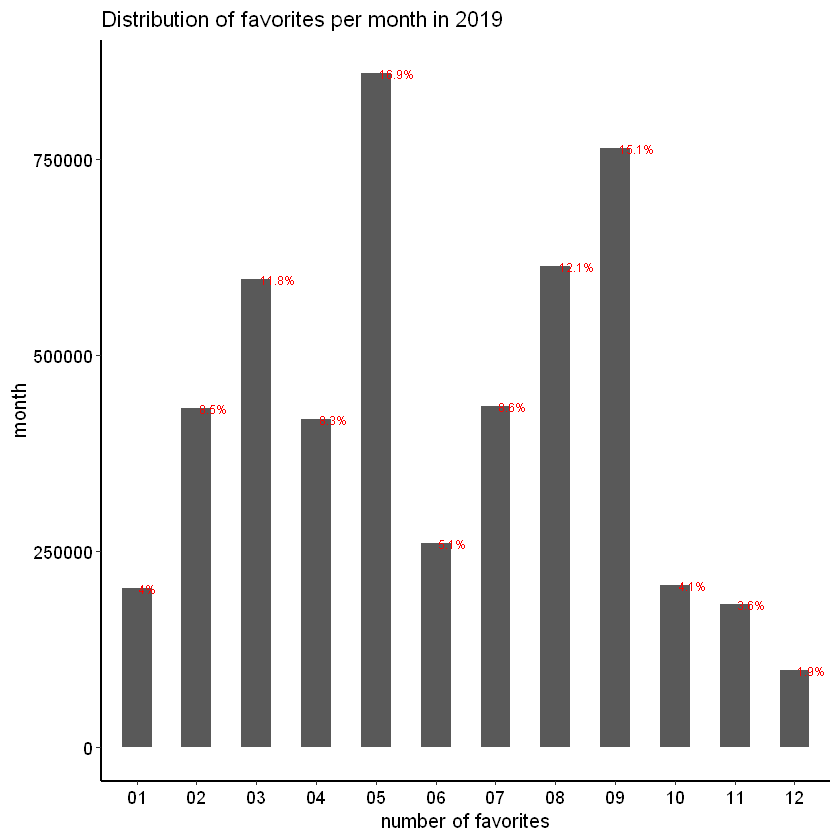

In [69]:
# number of favourites per tweets per month in 2019
favourites_plot <- tesla_tweets_2019 %>% group_by(month) %>% summarize(count = sum(favorite_count))

# plotting
ggplot(favourites_plot, aes(y=count, x=month)) +
  geom_bar(stat = "identity", width=0.5) +
  geom_text(aes(label=paste(round(count/5066025*100,1),"%",sep="")),hjust=-0.1, col="red", size=2.5) +
  labs(title= "Distribution of favorites per month in 2019",
       y="month", x = "number of favorites")

#### III.k) Use of Images in Tweets

In [70]:
# type of media used
unique(tesla_tweets_2019$media_type)

[[1]]
[1] NA

[[2]]
[1] "photo"

In [71]:
# checking the media_url column
colnames(tesla_tweets_2019)
unique(tesla_tweets_2019$media_url)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "quote_count"             "reply_count"            
[17] "hashtags"                "symbols"                
[19] "urls_url"                "urls_t.co"              
[21] "urls_expanded_url"       "media_url"              
[23] "media_t.co"              "media_expanded_url"     
[25] "media_type"              "ext_media_url"          
[27] "ext_media_t.co"          "ext_media_expanded_url" 
[29] "ext_media_type"          "mentions_user_id"       
[31] "mentions_screen_name"    "lang"                   
[33] "quoted_status_id"        "quoted_text"            
[35] "quoted_created_at"       "quoted_source"          
[37] "quoted_favorite_count"   "quoted_retweet_count"   
[39] "quoted_user_id"          "quoted_screen_name"     
[41] "quoted_name"             "quoted_followers_count" 
[43] "quoted_friends_count"    "quoted_statuses_count"  
[45] "quoted_location"         "quoted_description"     
[47] "quoted_verified"         "retweet_status_id"      
[49] "retweet_text"            "retweet_created_at"     
[51] "retweet_source"          "retweet_favorite_count" 
[53] "retweet_retweet_count"   "retweet_user_id"        
[55] "retweet_screen_name"     "retweet_name"           
[57] "retweet_followers_count" "retweet_friends_count"  
[59] "retweet_statuses_count"  "retweet_location"       
[61] "retweet_description"     "retweet_verified"       
[63] "place_url"               "place_name"             
[65] "place_full_name"         "place_type"             
[67] "country"                 "country_code"           
[69] "geo_coords"              "coords_coords"          
[71] "bbox_coords"             "status_url"             
[73] "name"                    "location"               
[75] "description"             "url"                    
[77] "protected"               "followers_count"        
[79] "friends_count"           "listed_count"           
[81] "statuses_count"          "favourites_count"       
[83] "account_created_at"      "verified"               
[85] "profile_url"             "profile_expanded_url"   
[87] "account_lang"            "profile_banner_url"     
[89] "profile_background_url"  "profile_image_url"      
[91] "date"                    "time"                   
[93] "year"                    "month"                  
[95] "hour"                    "day_num"                
[97] "day"                     "engagement_rate"

[[1]]
[1] NA

[[2]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1203082315104055296/pu/img/jM5bbDFDmAg_hQxi.jpg"

[[3]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1198343601740075008/pu/img/Q0onfGtNBK0KnSM1.jpg"

[[4]]
[1] "http://pbs.twimg.com/media/EJ8T6aiUYAAzFsx.jpg"

[[5]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1197612282231939072/pu/img/5ekNwSMeB5fcnz2I.jpg"

[[6]]
[1] "http://pbs.twimg.com/media/EGCsObLXkAI-4qa.jpg"

[[7]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1177302810259595272/pu/img/UXQIAlhbO0p1Cj8a.jpg"

[[8]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1177302173220294657/pu/img/8MVwtSCEr9dLIIyP.jpg"

[[9]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1177301649259487233/pu/img/AntjH0M0kDUe84fU.jpg"

[[10]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1177301198988304384/pu/img/qWHlawt10j0Fr0Ag.jpg"

[[11]]
[1] "http://pbs.twimg.com/tweet_video_thumb/EFU_HtCXoAEx-Y_.jpg"

[[12]]
[1] "http://pbs.twimg.com/media/EE6cOwjXkAAv1e8.jpg"

[[13]]
[1] "http://pbs.twimg.com/media/EE2ETv4XYAA04Kx.jpg"

[[14]]
[1] "http://pbs.twimg.com/media/EEw-yqcWwAIE_Mi.jpg"

[[15]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1171953357113589761/pu/img/gozcryK4EpvtL058.jpg"

[[16]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1170380894097563649/pu/img/M7BzszKyHP_sbS7F.jpg"

[[17]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1170380534364684288/pu/img/bRReAI9UhD42vkx5.jpg"

[[18]]
[1] "http://pbs.twimg.com/media/EDuIjvMXkAAINcf.jpg"

[[19]]
[1] "http://pbs.twimg.com/media/EDZtTe0W4AANt5q.jpg"

[[20]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1168236103830298624/pu/img/eQe2Txv4CyPDq4-a.jpg"

[[21]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1167904884076662787/pu/img/hcoFXOS2Nnoc1wi_.jpg"

[[22]]
[1] "http://pbs.twimg.com/media/EDPlNdkXYAUaNlW.jpg"

[[23]]
[1] "http://pbs.twimg.com/media/EBiZqMDU0AE1PEY.jpg"

[[24]]
[1] "http://pbs.twimg.com/media/EBY5gC0XoAA7oh5.jpg"

[[25]]
[1] "http://pbs.twimg.com/media/EBTmKTEWwAAxpQH.jpg"

[[26]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1154802344778960896/pu/img/xayyMM_pVKcyvT9Z.jpg"

[[27]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1151962778682449940/pu/img/lsmU8iku67KGpRcn.jpg"

[[28]]
[1] "http://pbs.twimg.com/media/D_JsxnmVAAE1r_l.jpg"

[[29]]
[1] "http://pbs.twimg.com/media/D--13kjU4AAs7tP.jpg"

[[30]]
[1] "http://pbs.twimg.com/media/D-tDf3EXkAA5Wnw.jpg"

[[31]]
[1] "http://pbs.twimg.com/media/D-qNlHuX4AIuUew.jpg"

[[32]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1146600115882172417/pu/img/xrcRv3uD_jgOXznj.jpg"

[[33]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1146598167078567936/pu/img/ngeS3LQFYLb9p-v2.jpg"

[[34]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1146598052238483458/pu/img/At8AT3U8KD-leLbo.jpg"

[[35]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1146597971305234432/pu/img/4yiq3sS-KasNYDl2.jpg"

[[36]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1141040415388209152/pu/img/l6VJEdXVUSxrFC0B.jpg"

[[37]]
[1] "http://pbs.twimg.com/media/D7_R51vU0AEB16Z.jpg"

[[38]]
[1] "http://pbs.twimg.com/media/D7_D08sVsAA-5SO.jpg"

[[39]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1132679784255840256/pu/img/3QJTylD-6ktMANT2.jpg"

[[40]]
[1] "http://pbs.twimg.com/media/D6PHGxAX4AA8anl.jpg"

[[41]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1125288543658450944/pu/img/P5GKALlQV8Ii5nx-.jpg"

[[42]]
[1] "http://pbs.twimg.com/media/D6Gb6l7WsAA8dgt.jpg"

[[43]]
[1] "http://pbs.twimg.com/media/D6Enx-cX4AAQkSQ.jpg"

[[44]]
[1] "http://pbs.twimg.com/media/D5gHiIKU8AIf9H-.jpg"

[[45]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1123345454660370432/pu/img/uUwR2DTcHSduNF0r.jpg"

[[46]]
[1] "http://pbs.twimg.com/ext_tw_video_thumb/1122162250783944704/pu/img/h3Uf6LNXa243OPn5.jpg"

[[47]]
[1] "http://pbs.twimg.com/media/D5AczxmUIAA7y45.jpg"

[[48]]
[1] "http://pbs.twimg.com/media/D459GpgXoAAVeo5.jpg"

[[49]]
[1] "http://pbs.twimg.com/media/D44RGpnUEAAC2RN.jpg"

[[50]]
[1] "http://pbs.twimg.com/media/D44QvYmUIAAPres.jpg"

[[51]]
[1] "http://pbs.twimg.com/ext_tw_video_thum

In [72]:
# total  number of images used
tesla_tweets_2019 %>% filter(!is.na(media_url)) %>% count()

n 
1 92

`summarise()` ungrouping output (override with `.groups` argument)


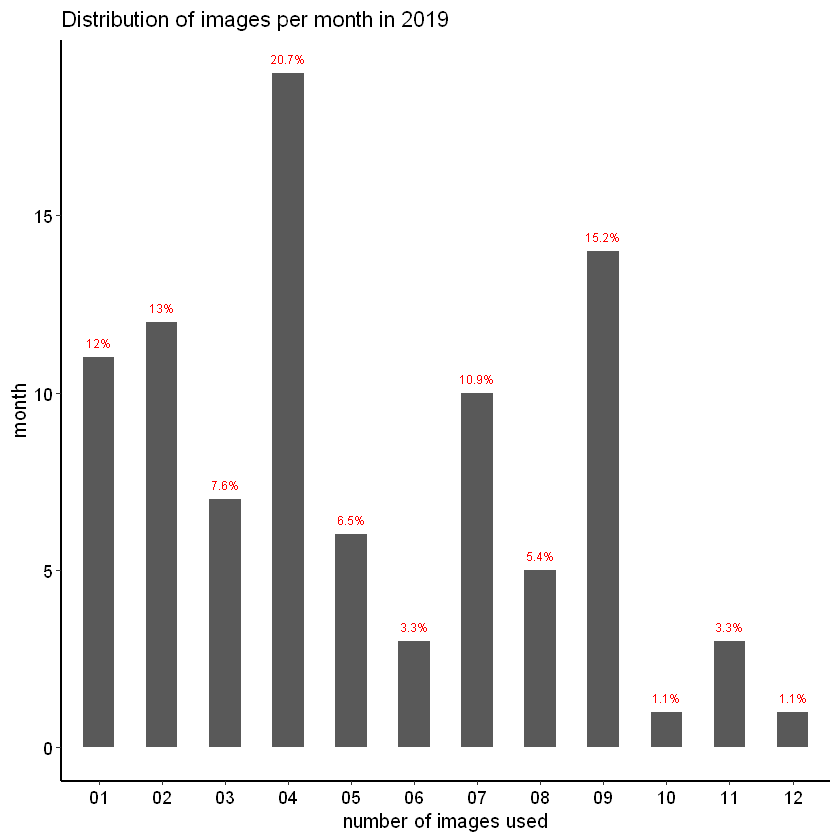

In [73]:
# number of tweets with images per month
images_usage_plot <- tesla_tweets_2019 %>% filter(!is.na(media_url)) %>% group_by(month) %>% summarize(count = n())

# plotting
ggplot(images_usage_plot, aes(y=count, x=month)) +
  geom_bar(stat = "identity", width=0.5) +
  geom_text(aes(label=paste(round(count/92*100,1),"%",sep="")),vjust=-1, col="red", size=2.5) +
  labs(title= "Distribution of images per month in 2019",
       y="month", x = "number of images used")

In [74]:
# most retweets
tesla_most_retweets <- tesla_tweets_organic %>% filter(!is.na(media_url)) %>% arrange(-retweet_count)
tesla_most_retweets[1:5,22]

media_url                                                                              
1 http://pbs.twimg.com/ext_tw_video_thumb/1095884933334069249/pu/img/_YCYsC28hpWehxax.jpg
2 http://pbs.twimg.com/ext_tw_video_thumb/1141040415388209152/pu/img/l6VJEdXVUSxrFC0B.jpg
3 http://pbs.twimg.com/media/D2AILirUcAAgHHY.jpg                                         
4 http://pbs.twimg.com/media/EE6cOwjXkAAv1e8.jpg                                         
5 http://pbs.twimg.com/ext_tw_video_thumb/1197612282231939072/pu/img/5ekNwSMeB5fcnz2I.jpg

In [75]:
# least retweets
tesla_least_retweets <- tesla_tweets_organic %>% filter(!is.na(media_url)) %>% arrange(retweet_count)
tesla_least_retweets[1:5,22]

media_url                                                                              
1 http://pbs.twimg.com/media/D6PHGxAX4AA8anl.jpg                                         
2 http://pbs.twimg.com/media/D2iERyFUgAAhUoV.jpg                                         
3 http://pbs.twimg.com/ext_tw_video_thumb/1132679784255840256/pu/img/3QJTylD-6ktMANT2.jpg
4 http://pbs.twimg.com/media/EBY5gC0XoAA7oh5.jpg                                         
5 http://pbs.twimg.com/media/D_JsxnmVAAE1r_l.jpg

##### click on most retweeted image -->
!m[alt text](http://pbs.twimg.com/ext_tw_video_thumb/1095884933334069249/pu/img/_YCYsC28hpWehxax.jpg "Logo Title Text 1")

##### click on least retweeted image -->
!m[alt text](http://pbs.twimg.com/media/D_JsxnmVAAE1r_l.jpg "Logo Title Text 1")

#

### IV. Twitter users responding or approaching Tesla

#### IV.a) Which Account Retweets Tesla's Tweets most ?

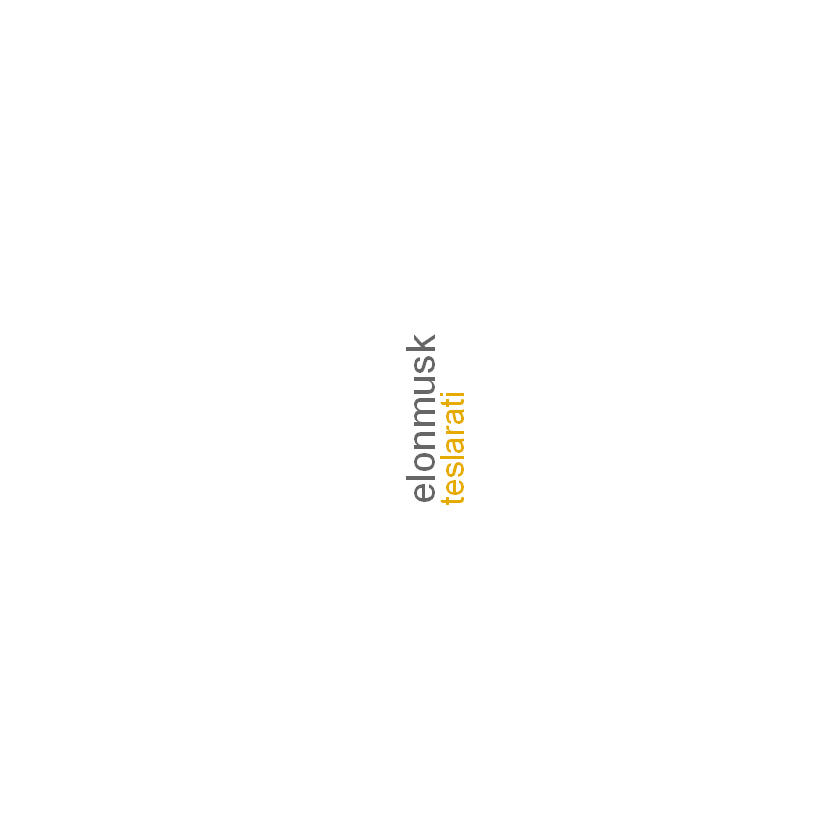

In [76]:
# Creating Retweet Account WordCloud

set.seed(1234)
wordcloud(tesla_tweets$retweet_screen_name, min.freq=3, scale=c(2, .5), random.order=FALSE, rot.per=0.25, 
          colors=brewer.pal(8, "Dark2"))

# 

#### IV.b) Who Are the People Who Contact Tesla and What Are They Interested In?

In [77]:
# Getting tweets addressed to Tesla (With Direct and Indirect mentions)

tweets_contact <- search_tweets(q = "@Tesla OR #Tesla OR $Tesla OR 'Tesla'", include_rts = FALSE,
                                `-filter` = "replies", token = twitter_token, lang = "en")

saveRDS(tweets_contact, file = "tweets_contact.rds")

In [78]:
tweets_contact <- readRDS(file = "tweets_contact.rds")

[1] 52

Selecting by n


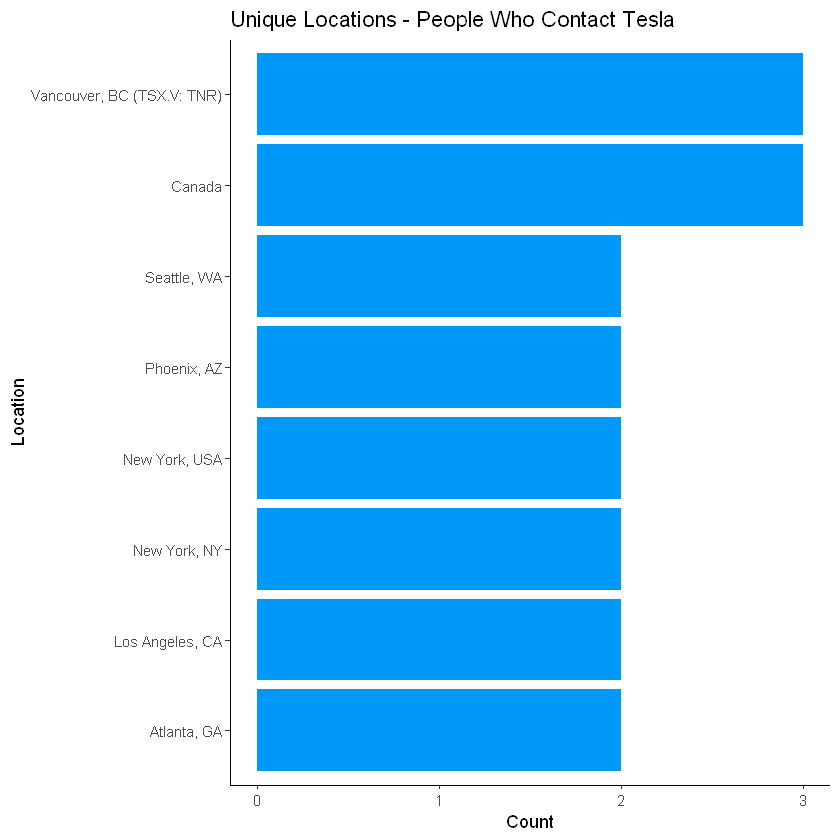

In [79]:
# Plotting the Top Locations of people contacting Tesla

length(unique(tweets_contact$location))

tweets_contact %>%
  filter(location != "") %>%
  filter(location != "Earth") %>%
  count(location, sort = TRUE) %>%
  mutate(location = reorder(location,n)) %>%
  na.omit() %>%
  top_n(3) %>%
  ggplot(aes(x = location,y = n)) +
  geom_col(fill = "#0099f9") +
  theme_classic() +
  coord_flip() +
      labs(x = "Location",
      y = "Count",
      title = "Unique Locations - People Who Contact Tesla")

In [80]:
# Getting the List Memberships of the Contacts

#contact_interests  <- do_call_rbind(lapply(tweets_contact$user_id,lists_memberships,n=200,token=twitter_token))

contact_interests <- read_excel("interest.xlsx")

Selecting by n


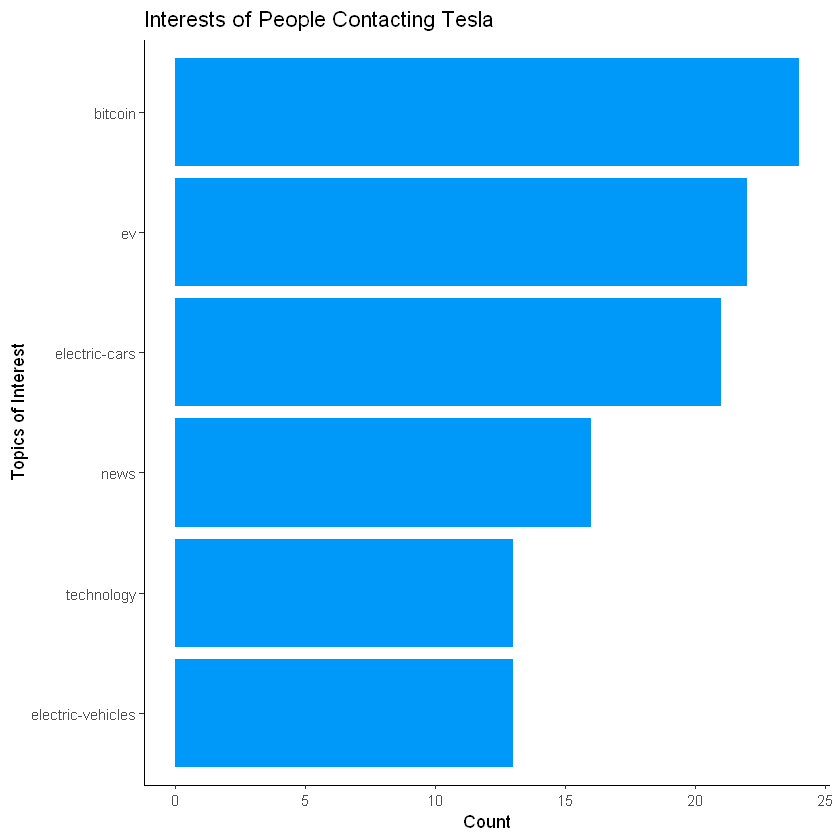

In [81]:
# Plotting the Top Interests of people contacting Tesla

contact_interests %>%
  count(slug, sort = TRUE) %>%
  mutate(slug = reorder(slug,n)) %>%
  na.omit() %>%
  top_n(5) %>%
  ggplot(aes(x = slug,y = n)) +
  geom_col(fill = "#0099f9") +
  theme_classic() +
  coord_flip() +
      labs(x = "Topics of Interest",
      y = "Count",
      title = "Interests of People Contacting Tesla")

#

### V. Sentiment Analysis
Our goal in this section of the code is to conduct a sentiment analysis on the contents of tweets. 

#### V.a) Preprocessing/cleaning methods

In [82]:
# Removing punctutation, symbols, numbers
tesla_tweets <- mutate(tesla_tweets, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
tesla_tweets$text

[1] "Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts\nhttpstcogvXKnGca"                                                                                                                                                               
  [2] "k Superchargers and counting httpstcourudytEui"                                                                                                                                                                                                                                                                   
  [3] "Theres no place like homeespecially if it has a Solar Roof\n\nThis Kansas ranch got theirs installed in  days"                                                                                                                                                                                                    
  [4] "Incar footage from Sunday’s Plaid Model S run at Laguna Seca httpstcorwQDBFCWoH"                                                                                                                                                                                                                                  
  [5] "The only thing beyond Ludicrous is Plaid"                                                                                                                                                                                                                                                                         
  [6] "Tesla Battery Day starts now"                                                                                                                                                                                                                                                                                     
  [7] "Aka  hours of uninterrupted wifi httpstcofvmYoERB"                                                                                                                                                                                                                                                                
  [8] "Big updates in <U+0001F1E8><U+0001F1E6> \n\n– TransCanada Supercharging <U+2705> \n– Model Y deliveries <U+2705> \n– Leasing for Model Y amp Model  <U+0001F3AF>\nhttpstcogyFBEIsjSP"                                                                                                                             
  [9] "In Tesla’s Q earnings call they dropped the little bombshell that Teslas solar panels cost  per watt after incentives  I found it can be even lower than that  This is big news  \n\nhttpstcoZQUfMVjR"                                                                                                            
 [10] "Live roof gt Dead roof httpstcoscCQUXUJb"                                                                                                                                                                                                                                                                         
 [11] "Looking up in Model Y httpstcoiAfpJZz"                                                                                                                                                                                                                                                                            
 [12] "Tesla Q Vehicle Safety Report httpstcoCnobBwGc"                                                                                                                                                                                                                                                                   
 [13] "httpstcojmkacbRbD"                                                                                                                                                                                                                 

In [83]:
# tokenisation
tesla_tweets_tokenized <- tesla_tweets %>% unnest_tokens(output = "word", input = text, token ="words", drop = FALSE, to_lower = TRUE)
head(tesla_tweets_tokenized)

user_id  status_id           created_at          screen_name
1 13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
2 13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
3 13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
4 13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
5 13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
6 13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
  text                                                                                                                                              
1 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts\nhttpstcogvXKnGca
2 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts\nhttpstcogvXKnGca
3 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts\nhttpstcogvXKnGca
4 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts\nhttpstcogvXKnGca
5 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts\nhttpstcogvXKnGca
6 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts\nhttpstcogvXKnGca
  source          display_text_width reply_to_status_id reply_to_user_id
1 Twitter Web App 154                NA                 NA              
2 Twitter Web App 154                NA                 NA              
3 Twitter Web App 154                NA                 NA              
4 Twitter Web App 154                NA                 NA              
5 Twitter Web App 154                NA                 NA              
6 Twitter Web App 154                NA                 NA              
  reply_to_screen_name ...
1 NA                   ...
2 NA                   ...
3 NA                   ...
4 NA                   ...
5 NA                   ...
6 NA                   ...
  profile_image_url                                                          
1 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
2 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
3 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
4 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
5 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
6 http://pbs.twimg.com/profile_images/1337607516008501250/6Ggc4S5n_normal.png
  date       time     year month hour day_num day       engagement_rate word  
1 2020-11-11 19:26:15 2020 11    19   3       Wednesday 0.1557584       order 
2 2020-11-11 19:26:15 2020 11    19   3       Wednesday 0.1557584       solar 
3 2020-11-11 19:26:15 2020 11    19   3       Wednesday 0.1557584       panels
4 2020-11-11 19:26:15 2020 11    19   3       Wednesday 0.1557584       before
5 2020-11-11 19:26:15 2020 11    19   3       Wednesday 0.1557584       the   
6 2020-11-11 19:26:15 2020 11    19   3       Wednesday 0.1557584       solar

In [84]:
# correcting the spelling with a function

correct_spelling <- function(input) {
  output <- case_when(
    # any manual corrections
    input == 'license' ~ 'licence',
    # check and (if required) correct spelling
    !hunspell_check(input, dictionary('en_GB')) ~
      hunspell_suggest(input, dictionary('en_GB')) %>%
      # get first suggestion, or NA if suggestions list is empty
      map(1, .default = NA) %>%
      unlist(),
    TRUE ~ input # if word is correct
  )
  # if input incorrectly spelled but no suggestions, return input word
  ifelse(is.na(output), input, output)
}

In [85]:
# now, apply the function above to each word in our dataset.
# create a new variable that contains the 'corrected' word
tesla_tweets_tokenized <- tesla_tweets_tokenized %>%  mutate(suggestion = correct_spelling(word))

In [88]:
#we want to tokenize and delete the stopwords
tesla_tweets_tokenized <- tesla_tweets_tokenized %>% anti_join(get_stopwords())

# stemming
tesla_tweets_tokenized <- tesla_tweets_tokenized %>% mutate(word = wordStem(word))
tesla_tweets_tokenized

Joining, by = "word"


user_id  status_id           created_at          screen_name
1    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
2    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
3    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
4    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
5    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
6    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
7    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
8    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
9    13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
10   13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
11   13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
12   13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
13   13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
14   13298072 1326607188178006016 2020-11-11 19:26:15 Tesla      
15   13298072 1325493014941216768 2020-11-08 17:38:55 Tesla      
16   13298072 1325493014941216768 2020-11-08 17:38:55 Tesla      
17   13298072 1325493014941216768 2020-11-08 17:38:55 Tesla      
18   13298072 1325493014941216768 2020-11-08 17:38:55 Tesla      
19   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
20   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
21   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
22   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
23   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
24   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
25   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
26   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
27   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
28   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
29   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
30   13298072 1308618501062422528 2020-09-23 04:05:38 Tesla      
...  ...      ...                 ...                 ...        
6870 13298072 1081117088662450177 2019-01-04 09:16:14 Tesla      
6871 13298072 1081117088662450177 2019-01-04 09:16:14 Tesla      
6872 13298072 1081117088662450177 2019-01-04 09:16:14 Tesla      
6873 13298072 1081117088662450177 2019-01-04 09:16:14 Tesla      
6874 13298072 1081117088662450177 2019-01-04 09:16:14 Tesla      
6875 13298072 1081117088662450177 2019-01-04 09:16:14 Tesla      
6876 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6877 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6878 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6879 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6880 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6881 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6882 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6883 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6884 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6885 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6886 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6887 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6888 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6889 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6890 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6891 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6892 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6893 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6894 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6895 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6896 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6897 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
6898 13298072 1080180385646952448 2019-01-01 

#### V.b) Dictionary Lookup and Words Frequency

In [89]:
#for the scope of this analysis we limited the dictionary usage to the BING one.
tesla_tweets_sentiment<- inner_join(tesla_tweets_tokenized, get_sentiments("bing"))
head(tesla_tweets_sentiment)

Joining, by = "word"


user_id  status_id           created_at          screen_name
1 13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
2 13298072 1291831728009441280 2020-08-07 20:20:59 Tesla      
3 13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
4 13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
5 13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
6 13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
  text                                                                                                                                                                          
1 Theres no place like homeespecially if it has a Solar Roof\n\nThis Kansas ranch got theirs installed in  days                                                                 
2 Live roof gt Dead roof httpstcoscCQUXUJb                                                                                                                                      
3 Tesla wins  Kelley Blue Book awards\n\n<U+0001F3C6> Best Overall\n<U+0001F3C6> Best Value\n<U+0001F3C6> Most Refined\n<U+0001F3C6> Best Performance\n<U+0001F3C6> Best Styling
4 Tesla wins  Kelley Blue Book awards\n\n<U+0001F3C6> Best Overall\n<U+0001F3C6> Best Value\n<U+0001F3C6> Most Refined\n<U+0001F3C6> Best Performance\n<U+0001F3C6> Best Styling
5 Tesla wins  Kelley Blue Book awards\n\n<U+0001F3C6> Best Overall\n<U+0001F3C6> Best Value\n<U+0001F3C6> Most Refined\n<U+0001F3C6> Best Performance\n<U+0001F3C6> Best Styling
6 Tesla wins  Kelley Blue Book awards\n\n<U+0001F3C6> Best Overall\n<U+0001F3C6> Best Value\n<U+0001F3C6> Most Refined\n<U+0001F3C6> Best Performance\n<U+0001F3C6> Best Styling
  source                           display_text_width reply_to_status_id
1 Twitter for Advertisers (legacy) 113                NA                
2 Twitter Web App                   24                NA                
3 Twitter Web App                  116                NA                
4 Twitter Web App                  116                NA                
5 Twitter Web App                  116                NA                
6 Twitter Web App                  116                NA                
  reply_to_user_id reply_to_screen_name ... time     year month hour day_num
1 NA               NA                   ... 23:51:34 2020 10    23   5      
2 NA               NA                   ... 20:20:59 2020 08    20   5      
3 NA               NA                   ... 00:41:11 2020 04    00   4      
4 NA               NA                   ... 00:41:11 2020 04    00   4      
5 NA               NA                   ... 00:41:11 2020 04    00   4      
6 NA               NA                   ... 00:41:11 2020 04    00   4      
  day      engagement_rate word  suggestion sentiment
1 Friday   0.3774884       like  like       positive 
2 Friday   0.3100571       dead  dead       negative 
3 Thursday 0.4942532       win   wins       positive 
4 Thursday 0.4942532       award awards     positive 
5 Thursday 0.4942532       best  best       positive 
6 Thursday 0.4942532       best  best       positive

In [90]:
#get the most positive / negative words 
summarySentiment <- tesla_tweets_sentiment %>% count(word, sentiment, sort = TRUE) %>% group_by(sentiment) %>% top_n(10) %>% arrange(n) %>% as.data.frame(stringsAsFactors = FALSE)
head(summarySentiment)

Selecting by n


word    sentiment n
1 alarm   negative  3
2 bad     negative  3
3 blame   negative  3
4 bore    negative  3
5 burn    negative  3
6 combust negative  3

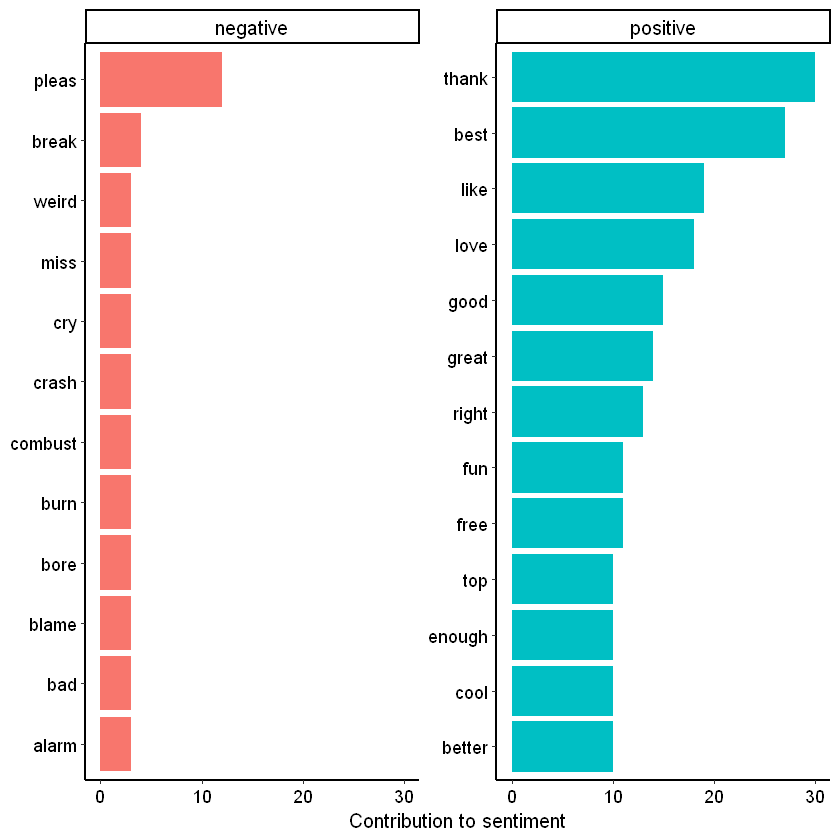

In [91]:
#here we want to get a plot of the summary of the most used words and their meaning
library(ggplot2)
summarySentiment %>%
    ungroup() %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(word, n, fill = sentiment)) + 
    geom_col(show.legend = FALSE) +
    facet_wrap(~sentiment, scales = "free_y") +
    labs(y="Contribution to sentiment", x = NULL) + coord_flip()

In [92]:
#we want to get a status for tweets, so that we can recognize which were the positive and the negative ones.
library(tidyr)
statusSentiment <- tesla_tweets_sentiment %>% count(status_id, sentiment) %>% pivot_wider(id_cols = status_id, names_from = sentiment, values_from = n, values_fill = 0) %>% mutate(sentiment = positive - negative)
head(statusSentiment)

status_id           positive negative sentiment
1 1080180385646952448 2        0         2       
2 1081322680857518080 0        1        -1       
3 1082723474915844096 2        0         2       
4 1083035284193726464 1        0         1       
5 1083410738717179904 2        0         2       
6 1083832799285538816 1        0         1

#### V.c) Sentiments Over Time

In [93]:
#we use a new variable, prova, as a support to extract only the tweets for which we have a sentiment. The final aim of this is to get a plot of sentiment over time, hence we need to link the sentiment to the original database in order to extract the dates too.

prova <- intersect(statusSentiment$status_id, tesla_tweets_sentiment$status_id)
length(prova)

[1] 307

In [94]:
support_time <- tesla_tweets_sentiment[tesla_tweets_sentiment$status_id %in% prova, ]
support_time

user_id  status_id           created_at          screen_name
1   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
2   13298072 1291831728009441280 2020-08-07 20:20:59 Tesla      
3   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
4   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
5   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
6   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
7   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
8   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
9   13298072 1241824684586352640 2020-03-22 20:30:51 Tesla      
10  13298072 1239021421264691200 2020-03-15 02:51:41 Tesla      
11  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
12  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
13  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
14  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
15  13298072 1226628461277483008 2020-02-09 22:06:29 Tesla      
16  13298072 1214488420770181121 2020-01-07 10:06:18 Tesla      
17  13298072 1209532295813554176 2019-12-24 17:52:26 Tesla      
18  13298072 1197952164565372929 2019-11-22 18:57:07 Tesla      
19  13298072 1194708409251069952 2019-11-13 20:07:36 Tesla      
20  13298072 1194708409251069952 2019-11-13 20:07:36 Tesla      
21  13298072 1194708409251069952 2019-11-13 20:07:36 Tesla      
22  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
23  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
24  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
25  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
26  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
27  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
28  13298072 1184202345170817024 2019-10-15 20:20:15 Tesla      
29  13298072 1184202345170817024 2019-10-15 20:20:15 Tesla      
30  13298072 1183780121238560768 2019-10-14 16:22:29 Tesla      
... ...      ...                 ...                 ...        
449 13298072 1090785977935683585 2019-01-31 01:36:57 Tesla      
450 13298072 1089955012493492224 2019-01-28 18:35:00 Tesla      
451 13298072 1089211319499186176 2019-01-26 17:19:49 Tesla      
452 13298072 1088952353594630144 2019-01-26 00:10:47 Tesla      
453 13298072 1088567052955049985 2019-01-24 22:39:44 Tesla      
454 13298072 1088108037712171008 2019-01-23 16:15:46 Tesla      
455 13298072 1086353126859259904 2019-01-18 20:02:23 Tesla      
456 13298072 1086055977974034432 2019-01-18 00:21:37 Tesla      
457 13298072 1085964767909470208 2019-01-17 18:19:11 Tesla      
458 13298072 1085610645553242112 2019-01-16 18:52:02 Tesla      
459 13298072 1085610645553242112 2019-01-16 18:52:02 Tesla      
460 13298072 1085270976076623874 2019-01-15 20:22:18 Tesla      
461 13298072 1085270976076623874 2019-01-15 20:22:18 Tesla      
462 13298072 1085270976076623874 2019-01-15 20:22:18 Tesla      
463 13298072 1084962770506768384 2019-01-14 23:57:36 Tesla      
464 13298072 1084905184289943552 2019-01-14 20:08:47 Tesla      
465 13298072 1084905184289943552 2019-01-14 20:08:47 Tesla      
466 13298072 1084193247226867712 2019-01-12 20:59:48 Tesla      
467 13298072 1084193247226867712 2019-01-12 20:59:48 Tesla      
468 13298072 1084193247226867712 2019-01-12 20:59:48 Tesla      
469 13298072 1083849526438375424 2019-01-11 22:13:58 Tesla      
470 13298072 1083832799285538816 2019-01-11 21:07:30 Tesla      
471 13298072 1083410738717179904 2019-01-10 17:10:23 Tesla      
472 13298072 1083410738717179904 2019-01-10 17:10:23 Tesla      
473 13298072 1083035284193726464 2019-01-09 16:18:28 Tesla      
474 13298072 1082723474915844096 2019-01-08 19:39:27 Tesla      
475 13298072 1082723474915844096 2019-01-08 19:39:27 Tesla      
476 13298072 1081322680857518080 2019-01-04 22:53:11 Tesla      
477 13298072 1080180385646952448 2019-01-01 19:14:07 Tesla      
478 13298072 1080180385646952448 2019-0

In [95]:
#tesla_tweets_sentiment[tweets2020_sentiment$status_id %in% prova, ]

In [96]:
#tesla_tweets_sentiment$status_id %in% prova
length(prova)

[1] 307

In [97]:
#We tried to exclude the tweets for which we didn't obtained a strong sentiment expression
uneeded      <- which(!rownames(support_time) %in% rownames(statusSentiment))

#wait for the line below to check whether it was necessary
environment2 <- support_time[-uneeded,]
environment2

user_id  status_id           created_at          screen_name
1   13298072 1317251873687113730 2020-10-16 23:51:34 Tesla      
2   13298072 1291831728009441280 2020-08-07 20:20:59 Tesla      
3   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
4   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
5   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
6   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
7   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
8   13298072 1248048276714094592 2020-04-09 00:41:11 Tesla      
9   13298072 1241824684586352640 2020-03-22 20:30:51 Tesla      
10  13298072 1239021421264691200 2020-03-15 02:51:41 Tesla      
11  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
12  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
13  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
14  13298072 1235278941494980608 2020-03-04 19:00:24 Tesla      
15  13298072 1226628461277483008 2020-02-09 22:06:29 Tesla      
16  13298072 1214488420770181121 2020-01-07 10:06:18 Tesla      
17  13298072 1209532295813554176 2019-12-24 17:52:26 Tesla      
18  13298072 1197952164565372929 2019-11-22 18:57:07 Tesla      
19  13298072 1194708409251069952 2019-11-13 20:07:36 Tesla      
20  13298072 1194708409251069952 2019-11-13 20:07:36 Tesla      
21  13298072 1194708409251069952 2019-11-13 20:07:36 Tesla      
22  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
23  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
24  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
25  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
26  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
27  13298072 1184479086724427777 2019-10-16 14:39:55 Tesla      
28  13298072 1184202345170817024 2019-10-15 20:20:15 Tesla      
29  13298072 1184202345170817024 2019-10-15 20:20:15 Tesla      
30  13298072 1183780121238560768 2019-10-14 16:22:29 Tesla      
... ...      ...                 ...                 ...        
278 13298072 1126181709307838465 2019-05-08 17:46:57 Tesla      
279 13298072 1126179220986765314 2019-05-08 17:37:04 Tesla      
280 13298072 1126177054750277637 2019-05-08 17:28:27 Tesla      
281 13298072 1126177054750277637 2019-05-08 17:28:27 Tesla      
282 13298072 1126000518130798592 2019-05-08 05:46:58 Tesla      
283 13298072 1125992292223979521 2019-05-08 05:14:17 Tesla      
284 13298072 1125991364368437248 2019-05-08 05:10:35 Tesla      
285 13298072 1125990734136512512 2019-05-08 05:08:05 Tesla      
286 13298072 1125990734136512512 2019-05-08 05:08:05 Tesla      
287 13298072 1125864350378594311 2019-05-07 20:45:53 Tesla      
288 13298072 1125864350378594311 2019-05-07 20:45:53 Tesla      
289 13298072 1125861391213023232 2019-05-07 20:34:07 Tesla      
290 13298072 1125827072394432512 2019-05-07 18:17:45 Tesla      
291 13298072 1125807729312972802 2019-05-07 17:00:53 Tesla      
292 13298072 1125807729312972802 2019-05-07 17:00:53 Tesla      
293 13298072 1125770029201543169 2019-05-07 14:31:05 Tesla      
294 13298072 1125770029201543169 2019-05-07 14:31:05 Tesla      
295 13298072 1125769759226617857 2019-05-07 14:30:01 Tesla      
296 13298072 1125769759226617857 2019-05-07 14:30:01 Tesla      
297 13298072 1125667311019601920 2019-05-07 07:42:55 Tesla      
298 13298072 1125634766630469632 2019-05-07 05:33:36 Tesla      
299 13298072 1125629140835753985 2019-05-07 05:11:15 Tesla      
300 13298072 1125621529180377088 2019-05-07 04:41:00 Tesla      
301 13298072 1125506384215388161 2019-05-06 21:03:27 Tesla      
302 13298072 1125467291322322945 2019-05-06 18:28:07 Tesla      
303 13298072 1125464350754471936 2019-05-06 18:16:25 Tesla      
304 13298072 1125464350754471936 2019-05-06 18:16:25 Tesla      
305 13298072 1125435229005656070 2019-05-06 16:20:42 Tesla      
306 13298072 1125418715577757699 2019-05-06 15:15:05 Tesla      
307 13298072 1125412820613513216 2019-0

In [98]:
#as we want to get a plot of the sentiment over time, we need to convert the dates  
statusSentiment$time <- as.POSIXct(environment2$created_at, format ="%Y-%m-%dT%H:%M:%S", tz = "UTC")

In [99]:
#we re subset to make sure to just have tweets from January 2019
statusSentiment_graph <- subset(statusSentiment, time > '2019-01-01')
head(statusSentiment)

status_id           positive negative sentiment time               
1 1080180385646952448 2        0         2        2020-10-16 23:51:34
2 1081322680857518080 0        1        -1        2020-08-07 20:20:59
3 1082723474915844096 2        0         2        2020-04-09 00:41:11
4 1083035284193726464 1        0         1        2020-04-09 00:41:11
5 1083410738717179904 2        0         2        2020-04-09 00:41:11
6 1083832799285538816 1        0         1        2020-04-09 00:41:11

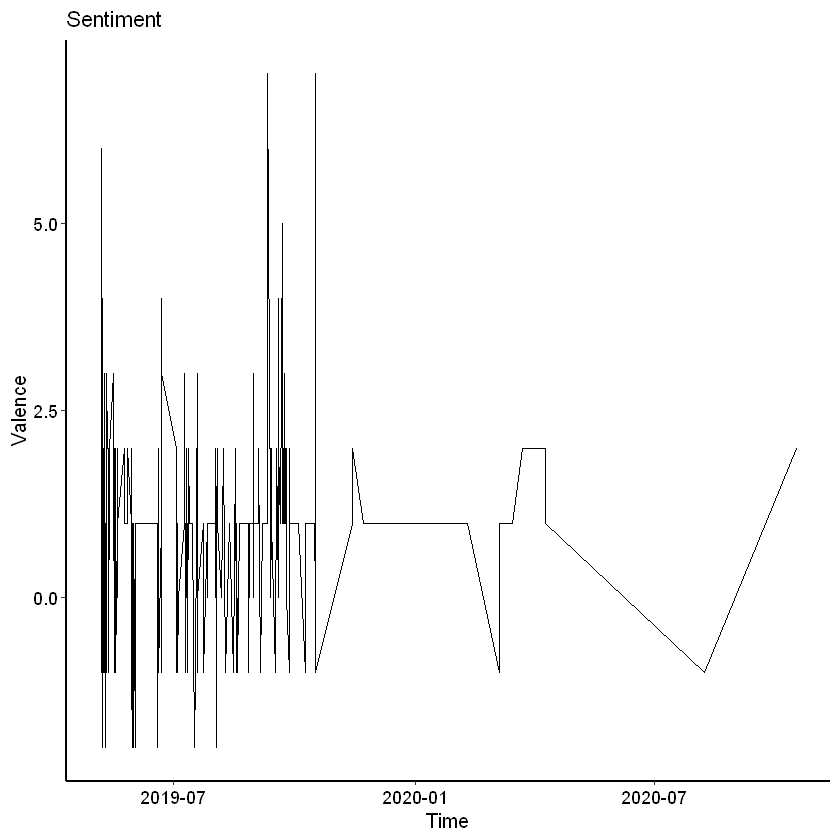

In [100]:
# plotting the sentiments over time
graph1 <- ggplot(statusSentiment_graph %>% arrange(time), aes(x = time, y = sentiment)) + geom_line() + labs(y="Valence", x = "Time", title ="Sentiment")

graph1

#

### VI. Concepts Analysis

#### VI.a) Most Recurrent Concepts

In [101]:
#we want to obtain some wordclouds to better understand which are the most recurrent concepts in Tesla's Tweets
ud_model <- udpipe_download_model(language="english")
ud_model <- udpipe_load_model(ud_model$file_model)

 - This model has been trained on version 2.5 of data from https://universaldependencies.org
 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0
 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.
 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')


In [102]:
#annotation
x <- udpipe_annotate(ud_model, x = tesla_tweets$text)
x <- as.data.frame(x)
head(x)

doc_id paragraph_id sentence_id
1 doc1   1            1          
2 doc1   1            1          
3 doc1   1            1          
4 doc1   1            1          
5 doc1   1            1          
6 doc1   1            1          
  sentence                                                                                                                                         
1 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts httpstcogvXKnGca
2 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts httpstcogvXKnGca
3 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts httpstcogvXKnGca
4 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts httpstcogvXKnGca
5 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts httpstcogvXKnGca
6 Order solar panels before the solar tax credit drops at the end of this year Pair with Powerwall to experience no more blackouts httpstcogvXKnGca
  token_id token  lemma  upos xpos feats                     head_token_id
1 1        Order  order  NOUN NN   Number=Sing               3            
2 2        solar  solar  ADJ  JJ   Degree=Pos                3            
3 3        panels panel  NOUN NNS  Number=Plur               0            
4 4        before before ADP  IN   NA                        9            
5 5        the    the    DET  DT   Definite=Def|PronType=Art 9            
6 6        solar  solar  ADJ  JJ   Degree=Pos                9            
  dep_rel  deps misc
1 compound NA   NA  
2 amod     NA   NA  
3 root     NA   NA  
4 case     NA   NA  
5 det      NA   NA  
6 amod     NA   NA

In [103]:
stats <- subset(x, upos %in% c("NOUN", "ADJ"))
stats <- txt_freq(x = stats$lemma)

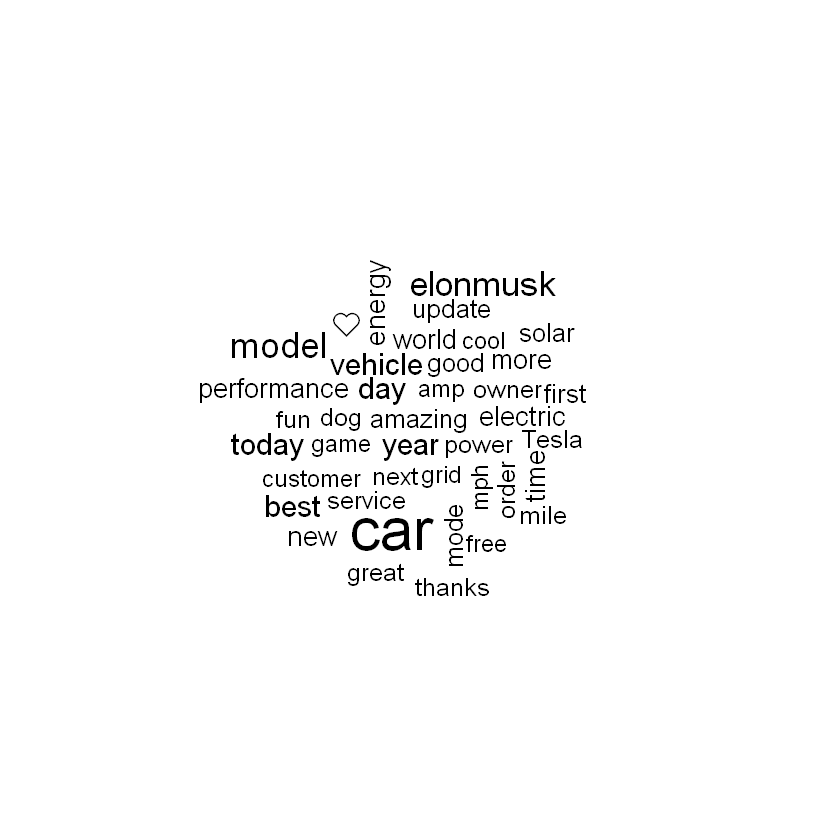

In [104]:
#with one word
options(warn=-1)
wordcloud(stats$key, stats$freq, max.words= 40, scale = c(3,1))

In [105]:
#coocurences
cooc <- cooccurrence(x= x$lemma, relevant = x$upos %in% c("NOUN", "ADJ"), skipgram = 2)
cooc

term1                                term2                               
1    <U+2764><U+FE0F>                     <U+2764><U+FE0F>                    
2    electric                             vehicle                             
3    electric                             car                                 
4    best                                 car                                 
5    free                                 Supercharging                       
6    service                              center                              
7    fossil                               fuel                                
8    software                             update                              
9    happy                                mother                              
10   thanks                               elonmusk                            
11   other                                car                                 
12   amazing                              car                                 
13   solar                                panel                               
14   solar                                panels                              
15   maple                                syrup                               
16   referral                             code                                
17   sustainable                          energy                              
18   solar                                energy                              
19   star                                 safety                              
20   highest                              score                               
21   <U+0001F947>                         <U+0001F941><U+0001F941><U+0001F941>
22   <U+0001F941><U+0001F941><U+0001F941> <U+0001F941><U+0001F941><U+0001F941>
23   car                                  cool                                
24   car                                  company                             
25   past                                 year                                
26   masebastien                          <U+2764><U+FE0F>                    
27   <U+2764><U+FE0F>                     clgood                              
28   road                                 trip                                
29   year                                 old                                 
30   mile                                 free                                
...  ...                                  ...                                 
2736 internal                             roll                                
2737 roll                                 line                                
2738 year                                 grid                                
2739 connector                            compatible                          
2740 compatible                           connector                           
2741 connector                            available                           
2742 Life                                 easy                                
2743 comfort                              garage                              
2744 motors                               control                             
2745 torque                               front                               
2746 front                                wheel                               
2747 superior                             control                             
2748 control                              weather                             
2749 noon                                 ManicMarge                          
2750 plane                                am                                  
2751 regards                              review                              
2752 better                               experience                          
2753 main                                 httpstcobycFhvyn                    
2754 energy                               year         

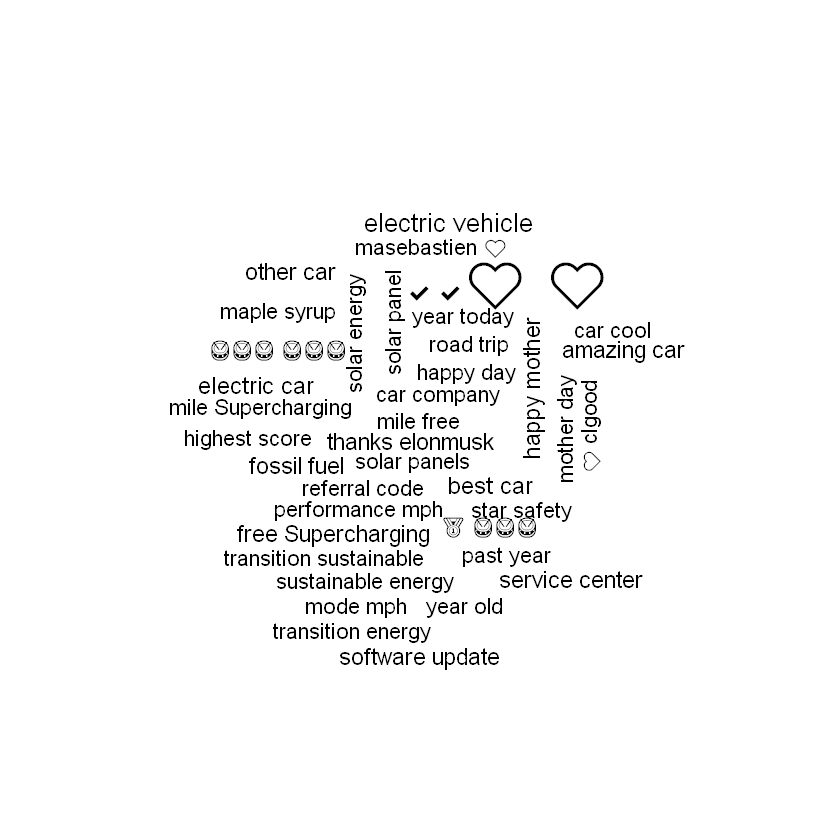

In [106]:
#with 2 words
options(warn =-1)
wordcloud(paste(cooc$term1, cooc$term2), cooc$cooc, max.words=40, scale = c(3,1))